# Sentiment Analysis IKN Article News

# SET UP

In [ ]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Membaca file csv yang di-upload
file_name = list(uploaded.keys())[0]
ikn_news_df = pd.read_csv(file_name)

Saving ikn_news_content_cleaned 22.51.41.csv to ikn_news_content_cleaned 22.51.41.csv


In [ ]:
ikn_news_df

judul         penerbit  \
0                Pro Kontra Pemindahan Ibu Kota Negara           Kompas   
1    Pro dan Kontra Megaproyek Nusantara: Nyata ata...  CNBC Indonesia​   
2                           Pro Kontra Pembangunan IKN       Kompasiana   
3    Pro Kontra Ibu Kota Baru RI, Simak Perdebatan ...  CNBC Indonesia​   
4    Pro-Kontra Saat Pemerintah Ngotot Putuskan Rev...            TEMPO   
..                                                 ...              ...   
186  JK Cerita Terkejut Ibu Kota Negara Diputuskan ...           Kompas   
187  Agenda Tersembunyi dan Argumen terhadap Kritik...           Kompas   
188  Pernyataan Lengkap Anies Kritik IKN Timbulkan ...            Detik   
189  Golkar Heran Anies Kritik Tujuan dan Langkah B...            Detik   
190        Kritik Bertubi Terkait Ibu Kota Negara Baru    VOA Indonesia   

                                                  link     tanggal    label  \
0    https://nasional.kompas.com/read/2023/05/21/06...  05/21/2023   Netral   
1    https://www.cnbcindonesia.com/opini/2024081613...  08/16/2024   Netral   
2    https://www.kompasiana.com/nurmalitamarinaa/66...  05/14/2024   Netral   
3    https://www.cnbcindonesia.com/news/20220128201...  01/28/2022   Netral   
4    https://www.tempo.co/politik/pro-kontra-saat-p...  08/22/2023   Netral   
..                                                 ...         ...      ...   
186  https://nasional.kompas.com/read/2024/01/25/06...  01/25/2024  Negatif   
187  https://www.kompas.id/baca/bebas-akses/2022/01...  01/29/2022   Netral   
188  https://www.detik.com/bali/berita/d-7062488/pe...  11/29/2023  Negatif   
189  https://news.detik.com/pemilu/d-7050632/golkar...  11/22/2023   Netral   
190  https://www.voaindonesia.com/a/kritik-bertubi-...  02/01/2022  Negatif   

                                               content  \
0    Pro Kontra Pemindahan Ibu Kota Negara Tim Reda...   
1    Catatan: Artikel ini merupakan opini pribadi p...   
2    Saya adalah mahasiswa Fakultas Hukum Universit...   
3    Jakarta, CNBC Indonesia - Ibu Kota Negara (IKN...   
4    Scroll ke bawah untuk membaca berita Baca beri...   
..                                                 ...   
186  JK Cerita Terkejut Ibu Kota Negara Diputuskan ...   
187  Relokasi ibu kota negara selalu penuh pro kont...   
188  Calon presiden (capres) Anies Baswedan mengkri...   
189  Capres nomor urut 1, Anies Baswedan, mengkriti...   
190  Print Rencana pembangunan Ibu Kota Negara (IKN...   

                                                  tags   status  
0    Pro Kontra Pemindahan Ibu Kota Negara, Argumen...  success  
1    ibu kota nusantara, nusantara, jokowi, kaliman...  success  
2    kota,pemindahan,pembangunan,ikn nusantara,kebi...  success  
3    ikn, nusantara, bappenas, ibu kota negara, kal...  success  
4                                       Tidak ada tags  success  
..                                                 ...      ...  
186  Jusuf Kalla, pemindahan ibu kota, JK, IKN, IKN...  success  
187  analisis, fenomena, regional, utama, ibu kota ...  success  
188                          anies baswedan,jokowi,ikn  success  
189      anies baswedan,ikn,golkar,pemilu 2024,politik  success  
190  Indonesia, Ibu Kota Negara Nusantara, ibu kota...  success  

[191 rows x 8 columns]

# Data Exploration

## Tanggal

In [ ]:
import pandas as pd

# Pastikan kolom tanggal dalam format datetime
ikn_news_df['tanggal'] = pd.to_datetime(ikn_news_df['tanggal'], errors='coerce')  # 'coerce' mengubah nilai invalid jadi NaT

# Hitung jumlah berita
jumlah_berita = ikn_news_df.shape[0]
print(f"Jumlah berita yang didapatkan terkait IKN: {jumlah_berita}")

# Cek tanggal kosong
if ikn_news_df['tanggal'].isna().any():
    print(f"Peringatan: {ikn_news_df['tanggal'].isna().sum()} data tidak memiliki tanggal.")

# Filter hanya data dengan tanggal valid
valid_dates = ikn_news_df.dropna(subset=['tanggal'])

if not valid_dates.empty:
    min_date = valid_dates['tanggal'].min()
    max_date = valid_dates['tanggal'].max()
    print(f"Rentang tanggal berita: {min_date.strftime('%d-%m-%Y')} hingga {max_date.strftime('%d-%m-%Y')}")
else:
    print("Tidak ada data dengan tanggal valid.")

Jumlah berita yang didapatkan terkait IKN: 191
Rentang tanggal berita: 27-08-2019 hingga 22-05-2025


In [ ]:
# Menghitung jumlah berita setiap tahun
ikn_news_df['tanggal'] = pd.to_datetime(ikn_news_df['tanggal'], errors='coerce')

# Ekstrak tahun dari kolom 'tanggal'
ikn_news_df['tahun'] = ikn_news_df['tanggal'].dt.year

# Menghitung jumlah berita per tahun
berita_per_tahun = ikn_news_df['tahun'].value_counts().sort_index()

berita_per_tahun_df = pd.DataFrame(berita_per_tahun).reset_index()
berita_per_tahun_df.columns = ['Tahun', 'Jumlah Berita']

# Menampilkan tabel
print(berita_per_tahun_df)

   Tahun  Jumlah Berita
0   2019              2
1   2021              1
2   2022             17
3   2023             34
4   2024             64
5   2025             73


**Jumlah berita** yang didapatkan terkait IKN pada Google News adalah **161**. Berita tersebut diambil dari **rentang tahun 2020 hingga 2024**.

**Jumlah berita yang paling banyak ditemukan adalah pada tahun 2021, diikuti oleh tahun 2023 dan 2022. Artikel dari tahun 2020 dan 2024 adalah yang paling sedikit didapatkan.**

Salah satu kemungkinan penyebab sedikitnya berita pada tahun 2020 dan 2024 adalah keterbatasan `Selenium` dalam pengambilan data berita. Selain itu, dapat juga disebabkan pembatasan oleh Google. Google News sering kali menerapkan pembatasan terkait jumlah halaman atau hasil pencarian yang dapat diakses secara otomatis. Ini bisa mengakibatkan Selenium tidak dapat mengambil seluruh berita yang ada, terutama yang berasal dari tahun-tahun yang lebih jauh, seperti 2020.

## Topik

In [ ]:
# Daftar kata kunci yang akan dicari di kolom 'judul'
keywords = ['IKN', 'Ibu Kota Nusantara']

# Membuat pola pencarian untuk kedua kata kunci
pattern_ikn = '|'.join(keywords)

# Filter DataFrame untuk hanya menampilkan baris yang sesuai dengan kata kunci
matching_titles_ikn_df = ikn_news_df[ikn_news_df['judul'].str.contains(pattern_ikn, case=False, na=False)]

# Menghitung jumlah kemunculan untuk masing-masing kata kunci
count_ibu_kota_nusantara = matching_titles_ikn_df['judul'].str.contains('Ibu Kota Nusantara', case=False, na=False).sum()
count_IKN = matching_titles_ikn_df['judul'].str.contains('IKN', case=False, na=False).sum()

# Menampilkan jumlah hasil
print(f"Jumlah judul yang menyebutkan 'Ibu Kota Nusantara': {count_ibu_kota_nusantara}")
print(f"Jumlah judul yang menyebutkan 'IKN': {count_IKN}")

print(matching_titles_ikn_df[['judul']])

Jumlah judul yang menyebutkan 'Ibu Kota Nusantara': 12
Jumlah judul yang menyebutkan 'IKN': 161
                                                 judul
2                           Pro Kontra Pembangunan IKN
4    Pro-Kontra Saat Pemerintah Ngotot Putuskan Rev...
5    Pro-Kontra Pembangunan IKN Sebagai Kota Cerdas...
6    Pro Kontra DPR Tolak Pindah ke IKN, Ekonom: Bi...
8                         IKN Merusak Paru-Paru Dunia?
..                                                 ...
183  Jarang Diungkap Pemerintah, Ternyata Begini Pe...
184  Selain ASN-Hankam, Bakal Ada Hunian buat Masya...
185  Otorita IKN Buka Suara soal Mundurnya Deputi B...
188  Pernyataan Lengkap Anies Kritik IKN Timbulkan ...
189  Golkar Heran Anies Kritik Tujuan dan Langkah B...

[169 rows x 1 columns]


In [ ]:
# Pola regex untuk menangani variasi penulisan "IKN" dan "Ibu Kota Nusantara"
pattern = r'IKN|Ibu\sKota\sNusantara'

# Filter DataFrame untuk menampilkan baris yang mengandung pola tersebut di kolom 'judul'
matching_titles_df = ikn_news_df[ikn_news_df['judul'].str.contains(pattern, case=False, na=False)]

# Menghitung jumlah kemunculan pola
matching_titles_count = matching_titles_df.shape[0]

# Menampilkan jumlah hasil
print(f"Jumlah judul yang mengandung 'IKN' atau 'Ibu Kota Nusantara': {matching_titles_count}")

# Mengambil rentang tahun dari berita yang ditemukan
matching_titles_df['tahun'] = matching_titles_df['tanggal'].dt.year

# Menghitung rentang tahun
min_year_ikn = matching_titles_df['tahun'].min()
max_year_ikn = matching_titles_df['tahun'].max()

# Menampilkan rentang tahun
print(f"Rentang tahun berita yang mengandung 'IKN' atau 'Ibu Kota Nusantara': {min_year_ikn} hingga {max_year_ikn}")

# Menampilkan DataFrame yang berisi judul-judul yang sesuai
print(matching_titles_df[['judul', 'tanggal']])


Jumlah judul yang mengandung 'IKN' atau 'Ibu Kota Nusantara': 169
Rentang tahun berita yang mengandung 'IKN' atau 'Ibu Kota Nusantara': 2022 hingga 2025
                                                 judul    tanggal
2                           Pro Kontra Pembangunan IKN 2024-05-14
4    Pro-Kontra Saat Pemerintah Ngotot Putuskan Rev... 2023-08-22
5    Pro-Kontra Pembangunan IKN Sebagai Kota Cerdas... 2024-06-15
6    Pro Kontra DPR Tolak Pindah ke IKN, Ekonom: Bi... 2024-03-21
8                         IKN Merusak Paru-Paru Dunia? 2023-03-23
..                                                 ...        ...
183  Jarang Diungkap Pemerintah, Ternyata Begini Pe... 2025-01-18
184  Selain ASN-Hankam, Bakal Ada Hunian buat Masya... 2025-05-18
185  Otorita IKN Buka Suara soal Mundurnya Deputi B... 2025-02-12
188  Pernyataan Lengkap Anies Kritik IKN Timbulkan ... 2023-11-29
189  Golkar Heran Anies Kritik Tujuan dan Langkah B... 2023-11-22

[169 rows x 2 columns]


<ipython-input-7-31e2376f1608>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_titles_df['tahun'] = matching_titles_df['tanggal'].dt.year


# Data Preprocessing

## Menyesuaikan Beberapa Nama Variabel

In [ ]:
# Buat kolom cleaned_content dari content ASLI, lalu lakukan standarisasi
ikn_news_df['cleaned_content'] = ikn_news_df['content'].copy()  # Salin isi asli
ikn_news_df['cleaned_content'] = ikn_news_df['cleaned_content'].replace(
    r'(?i)\bikn\b', 'IKN', regex=True
)

ikn_news_df['judul'] = ikn_news_df['judul'].replace(
    r'(?i)\bikn\b', 'IKN', regex=True
)

In [ ]:
# Cari dan hitung jumlah kemunculan 'IKN' di kolom 'judul'
jumlah_IKN_content= ikn_news_df['content'].str.contains(r'\bIKN\b').sum()

print(f"Jumlah kemunculan 'IKN' di kolom 'content': {jumlah_IKN_content}")

# Cari dan hitung jumlah kemunculan 'IKN' di kolom 'judul'
jumlah_IKN_judul = ikn_news_df['judul'].str.contains(r'\bIKN\b').sum()

print(f"Jumlah kemunculan 'IKN' di kolom 'judul': {jumlah_IKN_judul}")

Jumlah kemunculan 'IKN' di kolom 'content': 186
Jumlah kemunculan 'IKN' di kolom 'judul': 161


## Menghapus Emoji dan Karakter Lainnya

In [ ]:
# Fungsi untuk menghapus emoji dan karakter khusus dari teks
# Source: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emojis(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Menghapus emoji dan simbol dari kolom 'cleaned_content'
ikn_news_df['cleaned_content'] = ikn_news_df['cleaned_content'].apply(remove_emojis)

##Menghapus Tanda Baca

In [ ]:
import re
import string

def cleaning_text(text):
    # Menambah spasi setelah koma jika tidak ada spasi
    text = re.sub(r",(?!\s)", ", ", text)
    # Menghapus tab, newline, backslash
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    # Menghapus karakter non-ASCII (emoticon, huruf Cina, dll.)
    text = text.encode('ascii', 'replace').decode('ascii')
    # Menghapus URL
    text = re.sub(r"(?i)(?:https?:\/\/)?(?:www\.)?(?:[a-zA-Z0-9-.]+)(?:\.[a-zA-Z]{2,6})(?:\/[^\s\r\n]*)?", "", text)
    # Menghapus angka
    text = re.sub(r"\d+", "", text)
    # Menghapus tanda baca
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Menghapus whitespace berlebih dan karakter tunggal
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# Terapkan fungsi pembersihan ke kolom cleaned_content
ikn_news_df['cleaned_content'] = ikn_news_df['cleaned_content'].astype(str).apply(cleaning_text)


## Menghapus Kolom Content yang Kosong

In [ ]:
# Menghapus content yang bernilai kosong
ikn_news_df = ikn_news_df[ikn_news_df['cleaned_content'] != '']

In [ ]:
# Memeriksa apakah masih ada content kosong pada kolom 'content' atau tidak
ikn_news_df[ikn_news_df['cleaned_content'] == '']

Empty DataFrame
Columns: [judul, penerbit, link, tanggal, label, content, tags, status, tahun, cleaned_content]
Index: []

In [ ]:
# Jumlah data setelah melakukan preprocessing
ikn_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   judul            191 non-null    object        
 1   penerbit         191 non-null    object        
 2   link             191 non-null    object        
 3   tanggal          191 non-null    datetime64[ns]
 4   label            191 non-null    object        
 5   content          191 non-null    object        
 6   tags             191 non-null    object        
 7   status           191 non-null    object        
 8   tahun            191 non-null    int32         
 9   cleaned_content  191 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 14.3+ KB


## Lowercasing

In [ ]:
# Mengubah tipe data kolom cleaned_content dan judul menjadi string
ikn_news_df.loc[:, 'cleaned_content'] = ikn_news_df['cleaned_content'].astype(str)
ikn_news_df.loc[:, 'judul'] = ikn_news_df['judul'].astype(str)

In [ ]:
# Fungsi untuk mengubah teks menjadi huruf kecil kecuali 'IKN'
def lowercase_except_special(text):
    # Ubah semuanya ke huruf kecil terlebih dahulu
    text = text.lower()
    # Gunakan regex untuk mengembalikan 'IKN' ke bentuk aslinya
    text = re.sub(r'\bIKN\b', 'IKN', text, flags=re.IGNORECASE)
    return text

In [ ]:
# Terapkan fungsi ke kolom 'cleaned_content' dan 'judul'
ikn_news_df['cleaned_content'] = ikn_news_df['cleaned_content'].apply(lowercase_except_special)
ikn_news_df['judul'] = ikn_news_df['judul'].apply(lowercase_except_special)

In [ ]:
ikn_news_df

judul         penerbit  \
0                pro kontra pemindahan ibu kota negara           Kompas   
1    pro dan kontra megaproyek nusantara: nyata ata...  CNBC Indonesia​   
2                           pro kontra pembangunan IKN       Kompasiana   
3    pro kontra ibu kota baru ri, simak perdebatan ...  CNBC Indonesia​   
4    pro-kontra saat pemerintah ngotot putuskan rev...            TEMPO   
..                                                 ...              ...   
186  jk cerita terkejut ibu kota negara diputuskan ...           Kompas   
187  agenda tersembunyi dan argumen terhadap kritik...           Kompas   
188  pernyataan lengkap anies kritik IKN timbulkan ...            Detik   
189  golkar heran anies kritik tujuan dan langkah b...            Detik   
190        kritik bertubi terkait ibu kota negara baru    VOA Indonesia   

                                                  link    tanggal    label  \
0    https://nasional.kompas.com/read/2023/05/21/06... 2023-05-21   Netral   
1    https://www.cnbcindonesia.com/opini/2024081613... 2024-08-16   Netral   
2    https://www.kompasiana.com/nurmalitamarinaa/66... 2024-05-14   Netral   
3    https://www.cnbcindonesia.com/news/20220128201... 2022-01-28   Netral   
4    https://www.tempo.co/politik/pro-kontra-saat-p... 2023-08-22   Netral   
..                                                 ...        ...      ...   
186  https://nasional.kompas.com/read/2024/01/25/06... 2024-01-25  Negatif   
187  https://www.kompas.id/baca/bebas-akses/2022/01... 2022-01-29   Netral   
188  https://www.detik.com/bali/berita/d-7062488/pe... 2023-11-29  Negatif   
189  https://news.detik.com/pemilu/d-7050632/golkar... 2023-11-22   Netral   
190  https://www.voaindonesia.com/a/kritik-bertubi-... 2022-02-01  Negatif   

                                               content  \
0    Pro Kontra Pemindahan Ibu Kota Negara Tim Reda...   
1    Catatan: Artikel ini merupakan opini pribadi p...   
2    Saya adalah mahasiswa Fakultas Hukum Universit...   
3    Jakarta, CNBC Indonesia - Ibu Kota Negara (IKN...   
4    Scroll ke bawah untuk membaca berita Baca beri...   
..                                                 ...   
186  JK Cerita Terkejut Ibu Kota Negara Diputuskan ...   
187  Relokasi ibu kota negara selalu penuh pro kont...   
188  Calon presiden (capres) Anies Baswedan mengkri...   
189  Capres nomor urut 1, Anies Baswedan, mengkriti...   
190  Print Rencana pembangunan Ibu Kota Negara (IKN...   

                                                  tags   status  tahun  \
0    Pro Kontra Pemindahan Ibu Kota Negara, Argumen...  success   2023   
1    ibu kota nusantara, nusantara, jokowi, kaliman...  success   2024   
2    kota,pemindahan,pembangunan,ikn nusantara,kebi...  success   2024   
3    ikn, nusantara, bappenas, ibu kota negara, kal...  success   2022   
4                                       Tidak ada tags  success   2023   
..                                                 ...      ...    ...   
186  Jusuf Kalla, pemindahan ibu kota, JK, IKN, IKN...  success   2024   
187  analisis, fenomena, regional, utama, ibu kota ...  success   2022   
188                          anies baswedan,jokowi,ikn  success   2023   
189      anies baswedan,ikn,golkar,pemilu 2024,politik  success   2023   
190  Indonesia, Ibu Kota Negara Nusantara, ibu kota...  success   2022   

                                       cleaned_content  
0    pro kontra pemindahan ibu kota negara tim reda...  
1    catatan artikel ini merupakan opini pribadi pe...  
2    saya adalah mahasiswa fakultas hukum universit...  
3    jakarta cnbc indonesia ibu kota negara IKN ind...  
4    scroll ke bawah untuk membaca berita baca beri...  
..                                                 ...  
186  jk cerita terkejut ibu kota negara diputuskan ...  
187  relokasi ibu kota negara selalu penuh pro kont...  
188  calon presiden capres anies baswedan mengkriti...  
189  capres nomor urut anies baswedan mengkritik la... 

## Menghapus beberapa kata

In [ ]:
# Daftar teks yang ingin dihapus
texts_to_remove = [
    "beranda", "© copyright 2024", "scroll to continue with cleaned_content",
    "beranda »", "© 2024 all right reserved",
    "© copyright 2024 news indonesia all right reserve",
    "readid –", "© 2023 penerbit berita infopublik",
    "© all right reserved by smg",
    "© copyright 2020 pemerintah kota tangerang",
    "©2024 promedia teknologi",
    "scan this qr or download app from jakarta inewsid",
    "copyright", "all right reserved",
    "copyright©2020",
    "no more post available no more page to load view more",
    "no more page to load view more",
    "type above and press enter to search press esc to cancel",
    "©", "»", "all right reserve", "scan this qr or download app from: idxchannel",
    "✨ Minal Aidin Walfaidzin, Mohon Maaf Lahir & Bathin ✨ Minal Aidin Walfaidzin, Mohon Maaf Lahir & Bathin Waktu.news |",
    "© Copyright 2025 Berita.News · Theme by HWD BERITA.NEWS,Kaltim", "© Copyright 2025", "Jakarta, CNBC Indonesia - ",
    "Scroll ke bawah untuk membaca berita Baca berita dengan sedikit , klik disini", "SuaraKaltim.id - ", "Suara.com - ",
    " klik disini Baca berita dengan sedikit , klik disini Baca berita dengan sedikit , klik disini Baca berita dengan sedikit , klik disini Baca berita dengan sedikit , klik disini",
    "SuaraKaltim.id - ", "Suara.com - "
]

# Menghapus semua teks yang ada di daftar dari kolom 'cleaned_content'
for text in texts_to_remove:
    ikn_news_df['cleaned_content'] = ikn_news_df['cleaned_content'].str.replace(text, '', regex=False)

# Menampilkan hasil
ikn_news_df['cleaned_content'].head()

0    pro kontra pemindahan ibu kota negara tim reda...
1    catatan artikel ini merupakan opini pribadi pe...
2    saya adalah mahasiswa fakultas hukum universit...
3    jakarta cnbc indonesia ibu kota negara IKN ind...
4    scroll ke bawah untuk membaca berita baca beri...
Name: cleaned_content, dtype: object

In [ ]:
ikn_news_df

judul         penerbit  \
0                pro kontra pemindahan ibu kota negara           Kompas   
1    pro dan kontra megaproyek nusantara: nyata ata...  CNBC Indonesia​   
2                           pro kontra pembangunan IKN       Kompasiana   
3    pro kontra ibu kota baru ri, simak perdebatan ...  CNBC Indonesia​   
4    pro-kontra saat pemerintah ngotot putuskan rev...            TEMPO   
..                                                 ...              ...   
186  jk cerita terkejut ibu kota negara diputuskan ...           Kompas   
187  agenda tersembunyi dan argumen terhadap kritik...           Kompas   
188  pernyataan lengkap anies kritik IKN timbulkan ...            Detik   
189  golkar heran anies kritik tujuan dan langkah b...            Detik   
190        kritik bertubi terkait ibu kota negara baru    VOA Indonesia   

                                                  link    tanggal    label  \
0    https://nasional.kompas.com/read/2023/05/21/06... 2023-05-21   Netral   
1    https://www.cnbcindonesia.com/opini/2024081613... 2024-08-16   Netral   
2    https://www.kompasiana.com/nurmalitamarinaa/66... 2024-05-14   Netral   
3    https://www.cnbcindonesia.com/news/20220128201... 2022-01-28   Netral   
4    https://www.tempo.co/politik/pro-kontra-saat-p... 2023-08-22   Netral   
..                                                 ...        ...      ...   
186  https://nasional.kompas.com/read/2024/01/25/06... 2024-01-25  Negatif   
187  https://www.kompas.id/baca/bebas-akses/2022/01... 2022-01-29   Netral   
188  https://www.detik.com/bali/berita/d-7062488/pe... 2023-11-29  Negatif   
189  https://news.detik.com/pemilu/d-7050632/golkar... 2023-11-22   Netral   
190  https://www.voaindonesia.com/a/kritik-bertubi-... 2022-02-01  Negatif   

                                               content  \
0    Pro Kontra Pemindahan Ibu Kota Negara Tim Reda...   
1    Catatan: Artikel ini merupakan opini pribadi p...   
2    Saya adalah mahasiswa Fakultas Hukum Universit...   
3    Jakarta, CNBC Indonesia - Ibu Kota Negara (IKN...   
4    Scroll ke bawah untuk membaca berita Baca beri...   
..                                                 ...   
186  JK Cerita Terkejut Ibu Kota Negara Diputuskan ...   
187  Relokasi ibu kota negara selalu penuh pro kont...   
188  Calon presiden (capres) Anies Baswedan mengkri...   
189  Capres nomor urut 1, Anies Baswedan, mengkriti...   
190  Print Rencana pembangunan Ibu Kota Negara (IKN...   

                                                  tags   status  tahun  \
0    Pro Kontra Pemindahan Ibu Kota Negara, Argumen...  success   2023   
1    ibu kota nusantara, nusantara, jokowi, kaliman...  success   2024   
2    kota,pemindahan,pembangunan,ikn nusantara,kebi...  success   2024   
3    ikn, nusantara, bappenas, ibu kota negara, kal...  success   2022   
4                                       Tidak ada tags  success   2023   
..                                                 ...      ...    ...   
186  Jusuf Kalla, pemindahan ibu kota, JK, IKN, IKN...  success   2024   
187  analisis, fenomena, regional, utama, ibu kota ...  success   2022   
188                          anies baswedan,jokowi,ikn  success   2023   
189      anies baswedan,ikn,golkar,pemilu 2024,politik  success   2023   
190  Indonesia, Ibu Kota Negara Nusantara, ibu kota...  success   2022   

                                       cleaned_content  
0    pro kontra pemindahan ibu kota negara tim reda...  
1    catatan artikel ini merupakan opini pribadi pe...  
2    saya adalah mahasiswa fakultas hukum universit...  
3    jakarta cnbc indonesia ibu kota negara IKN ind...  
4    scroll ke bawah untuk membaca berita baca beri...  
..                                                 ...  
186  jk cerita terkejut ibu kota negara diputuskan ...  
187  relokasi ibu kota negara selalu penuh pro kont...  
188  calon presiden capres anies baswedan mengkriti...  
189  capres nomor urut anies baswedan mengkritik la... 

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'ikn_news_df.csv'
ikn_news_df.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke ikn_news_df.csv


In [ ]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'ikn_news_df.xlsx'
ikn_news_df.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke ikn_news_df.xlsx


# Sentiment Analysis

## Text Analysis (Sebelum Stopwords)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')  # Untuk fungsi word_tokenize
nltk.download('punkt_tab')  # Tambahkan unduhan untuk bagian tab
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Buat kolom tokens dari cleaned_content yang sudah diproses
ikn_news_df['tokens'] = ikn_news_df['cleaned_content'].apply(word_tokenize)

# Menghitung jumlah kata dengan tokenisasi menggunakan NLTK
ikn_news_df['wordCount'] = ikn_news_df['cleaned_content'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
ikn_news_df

judul         penerbit  \
0                pro kontra pemindahan ibu kota negara           Kompas   
1    pro dan kontra megaproyek nusantara: nyata ata...  CNBC Indonesia​   
2                           pro kontra pembangunan IKN       Kompasiana   
3    pro kontra ibu kota baru ri, simak perdebatan ...  CNBC Indonesia​   
4    pro-kontra saat pemerintah ngotot putuskan rev...            TEMPO   
..                                                 ...              ...   
186  jk cerita terkejut ibu kota negara diputuskan ...           Kompas   
187  agenda tersembunyi dan argumen terhadap kritik...           Kompas   
188  pernyataan lengkap anies kritik IKN timbulkan ...            Detik   
189  golkar heran anies kritik tujuan dan langkah b...            Detik   
190        kritik bertubi terkait ibu kota negara baru    VOA Indonesia   

                                                  link    tanggal    label  \
0    https://nasional.kompas.com/read/2023/05/21/06... 2023-05-21   Netral   
1    https://www.cnbcindonesia.com/opini/2024081613... 2024-08-16   Netral   
2    https://www.kompasiana.com/nurmalitamarinaa/66... 2024-05-14   Netral   
3    https://www.cnbcindonesia.com/news/20220128201... 2022-01-28   Netral   
4    https://www.tempo.co/politik/pro-kontra-saat-p... 2023-08-22   Netral   
..                                                 ...        ...      ...   
186  https://nasional.kompas.com/read/2024/01/25/06... 2024-01-25  Negatif   
187  https://www.kompas.id/baca/bebas-akses/2022/01... 2022-01-29   Netral   
188  https://www.detik.com/bali/berita/d-7062488/pe... 2023-11-29  Negatif   
189  https://news.detik.com/pemilu/d-7050632/golkar... 2023-11-22   Netral   
190  https://www.voaindonesia.com/a/kritik-bertubi-... 2022-02-01  Negatif   

                                               content  \
0    Pro Kontra Pemindahan Ibu Kota Negara Tim Reda...   
1    Catatan: Artikel ini merupakan opini pribadi p...   
2    Saya adalah mahasiswa Fakultas Hukum Universit...   
3    Jakarta, CNBC Indonesia - Ibu Kota Negara (IKN...   
4    Scroll ke bawah untuk membaca berita Baca beri...   
..                                                 ...   
186  JK Cerita Terkejut Ibu Kota Negara Diputuskan ...   
187  Relokasi ibu kota negara selalu penuh pro kont...   
188  Calon presiden (capres) Anies Baswedan mengkri...   
189  Capres nomor urut 1, Anies Baswedan, mengkriti...   
190  Print Rencana pembangunan Ibu Kota Negara (IKN...   

                                                  tags   status  tahun  \
0    Pro Kontra Pemindahan Ibu Kota Negara, Argumen...  success   2023   
1    ibu kota nusantara, nusantara, jokowi, kaliman...  success   2024   
2    kota,pemindahan,pembangunan,ikn nusantara,kebi...  success   2024   
3    ikn, nusantara, bappenas, ibu kota negara, kal...  success   2022   
4                                       Tidak ada tags  success   2023   
..                                                 ...      ...    ...   
186  Jusuf Kalla, pemindahan ibu kota, JK, IKN, IKN...  success   2024   
187  analisis, fenomena, regional, utama, ibu kota ...  success   2022   
188                          anies baswedan,jokowi,ikn  success   2023   
189      anies baswedan,ikn,golkar,pemilu 2024,politik  success   2023   
190  Indonesia, Ibu Kota Negara Nusantara, ibu kota...  success   2022   

                                       cleaned_content  \
0    pro kontra pemindahan ibu kota negara tim reda...   
1    catatan artikel ini merupakan opini pribadi pe...   
2    saya adalah mahasiswa fakultas hukum universit...   
3    jakarta cnbc indonesia ibu kota negara IKN ind...   
4    scroll ke bawah untuk membaca berita baca beri...   
..                                                 ...   
186  jk cerita terkejut ibu kota negara diputuskan ...   
187  relokasi ibu kota negara selalu penuh pro kont...   
188  calon presiden capres anies baswedan mengkriti...   
189  capres nomor urut anies baswedan mengkri

<ipython-input-26-d75ea0eb42bf>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_100_df, x='frequency', y='word', palette='viridis')


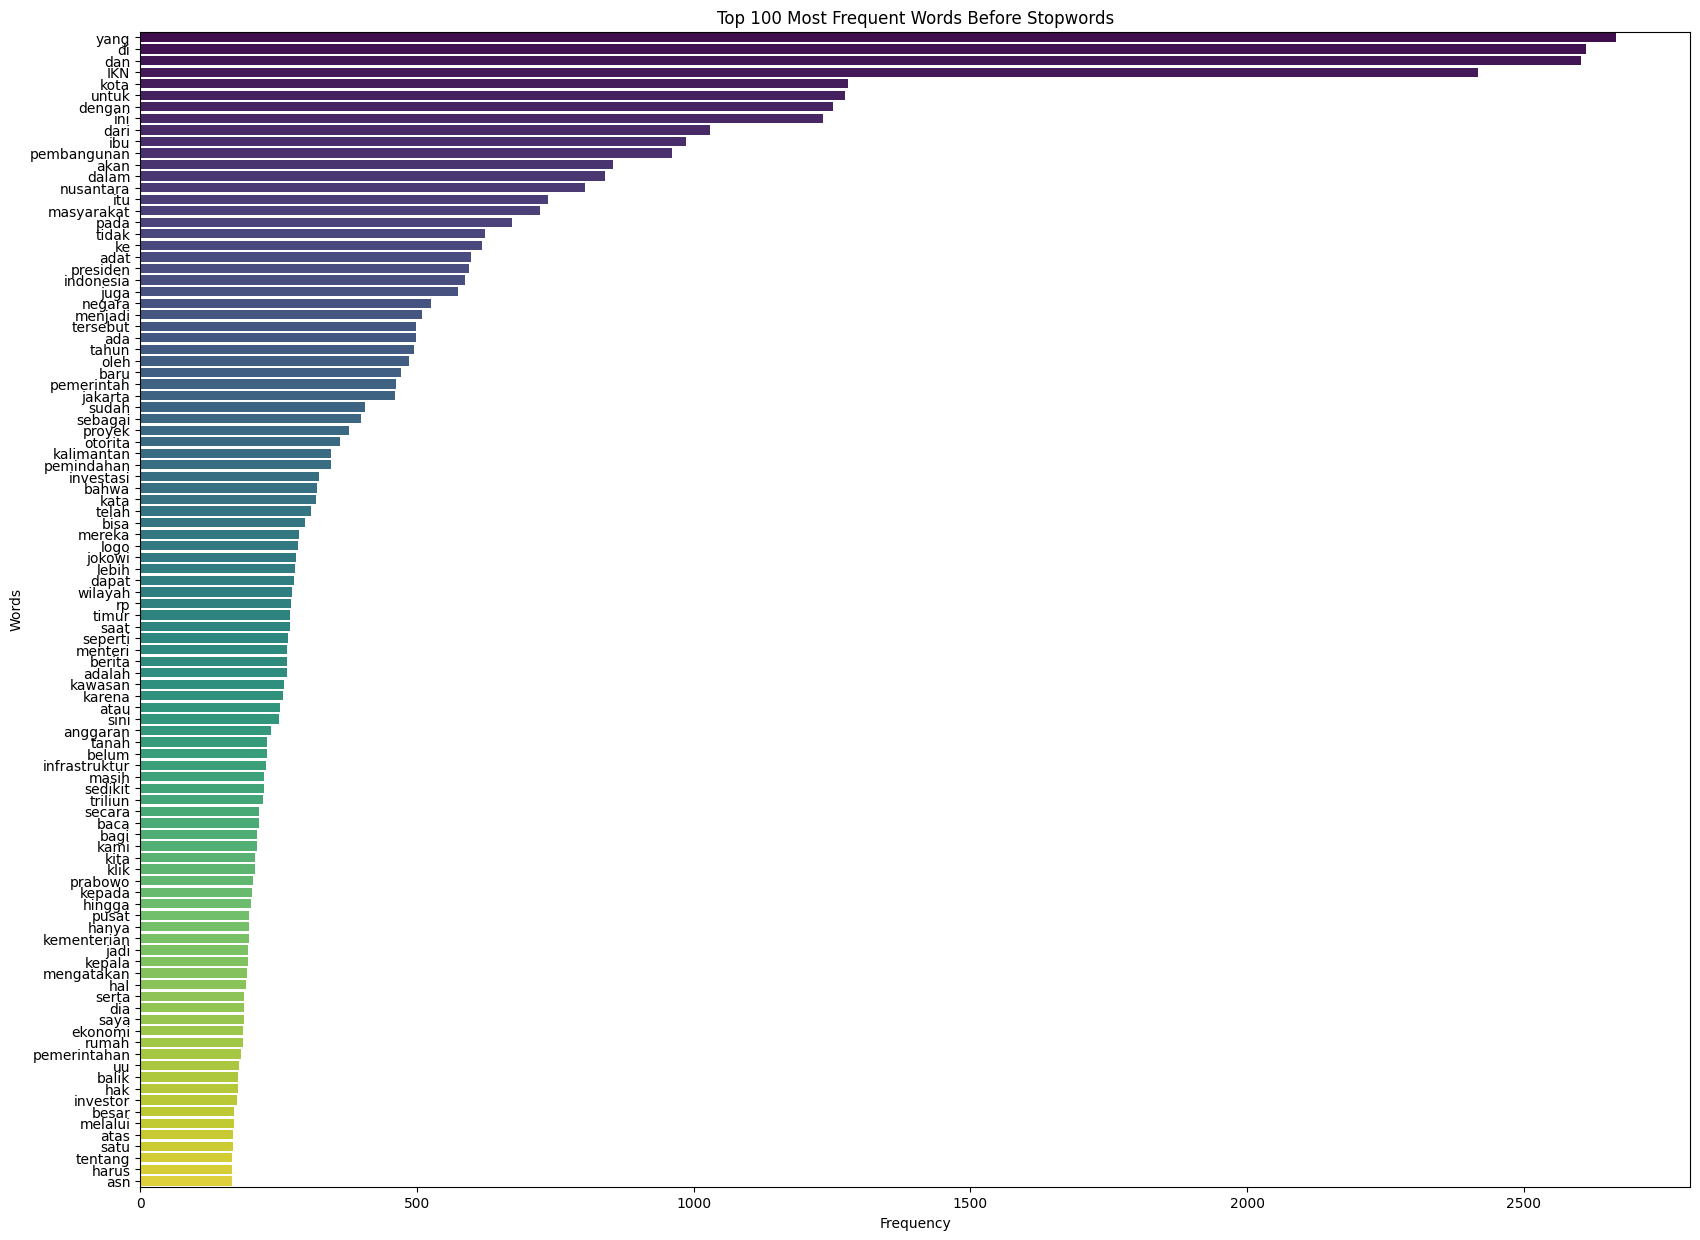

In [ ]:
from collections import Counter

# Menggabungkan semua teks dalam kolom 'cleaned_content' menjadi satu string
all_words = ' '.join(ikn_news_df['cleaned_content'])

# Menghitung frekuensi kata dan mendapatkan top 100
word_freq = Counter(all_words.split())
top_100_words = dict(word_freq.most_common(100))

# Menyimpan frekuensi kata sebagai DataFrame
top_100_df = pd.DataFrame(top_100_words.items(), columns=['word', 'frequency'])

# Mengurutkan DataFrame berdasarkan frekuensi
top_100_df = top_100_df.sort_values(by='frequency', ascending=False)

# Membuat diagram batang
plt.figure(figsize=(20, 15))
sns.barplot(data=top_100_df, x='frequency', y='word', palette='viridis')
plt.title("Top 100 Most Frequent Words Before Stopwords")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

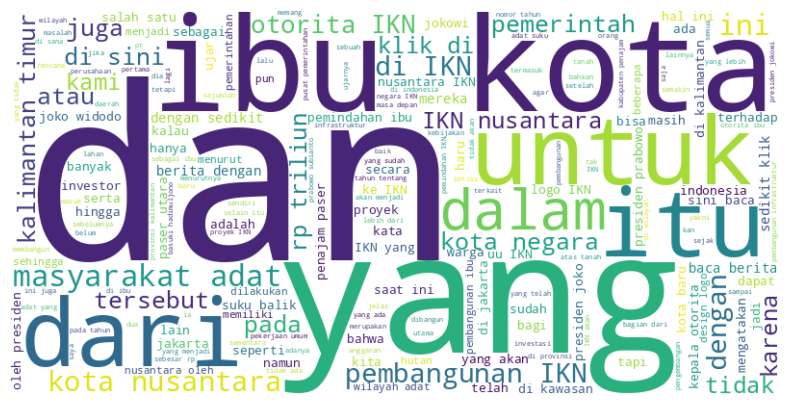

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat WordCloud dari seluruh kata dalam kolom 'content'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'ikn_news_df_before_stopwords.csv'
ikn_news_df.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke ikn_news_df_before_stopwords.csv


In [ ]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'ikn_news_df_before_stopwords.xlsx'
ikn_news_df.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke ikn_news_df_before_stopwords.xlsx


## Text Analysis (Setelah Stopwords)

In [ ]:
import requests
# Membuat DataFrame baru dengan kolom-kolom yang dipilih dari ikn_news_df
ikn_news_df_with_ikn = ikn_news_df[['link', 'judul','penerbit', 'tanggal', 'content', 'cleaned_content','tags', 'status', 'tahun', 'wordCount']].copy()

# Membuat DataFrame baru dengan kolom-kolom yang dipilih dari ikn_news_df
ikn_news_df_without_ikn = ikn_news_df[['link', 'judul','penerbit', 'tanggal', 'content', 'cleaned_content','tags', 'status', 'tahun', 'wordCount']].copy()

# Unduh daftar stopwords dari URL
url = 'https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt'
response = requests.get(url)

# Simpan daftar stopwords ke file lokal
with open('id_stopwords.txt', 'w', encoding='utf-8') as file:
    file.write(response.text)

# Baca stopwords dari file
with open('id_stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords_id = file.read().splitlines()

# Tambahkan stopwords khusus Anda
custom_stopwords = ["baca", "klik", "berita", "oikn", "brwa", "the", "isra", "mikraj", "rozaq qosdy", "rozaq", "qosdy", "anggi", "welem", "of", "ustadz abdul", "ustadz", "abdul","darmawi", "sri", "elisnawati", "nurmis", "syarariyah", "musmulyadi", "to", "scroll", "baca"]
stopwords_id.extend(custom_stopwords)

# Menghapus duplikat (jika ada)
stopwords_id = list(set(stopwords_id))

# Menampilkan informasi stopwords
print(f"Total {len(stopwords_id)} kata stopwords (termasuk custom stopwords)")
print("Contoh stopwords:", stopwords_id[:10] + ["..."] + custom_stopwords)


Total 782 kata stopwords (termasuk custom stopwords)
Contoh stopwords: ['mulailah', 'terakhir', 'percuma', 'diperlihatkan', 'rasa', 'menggunakan', 'berbagai', 'perlu', 'selama-lamanya', 'sesegera', '...', 'baca', 'klik', 'berita', 'oikn', 'brwa', 'the', 'isra', 'mikraj', 'rozaq qosdy', 'rozaq', 'qosdy', 'anggi', 'welem', 'of', 'ustadz abdul', 'ustadz', 'abdul', 'darmawi', 'sri', 'elisnawati', 'nurmis', 'syarariyah', 'musmulyadi', 'to', 'scroll', 'baca']


In [ ]:
def remove_stopwords(text, base_stopwords, extra_stopwords=None):
    base_stopwords = set(word.lower() for word in base_stopwords)
    if extra_stopwords:
        extra_stopwords = set(word.lower() for word in extra_stopwords)
        all_stopwords = base_stopwords.union(extra_stopwords)
    else:
        all_stopwords = base_stopwords

    words = text.split()
    filtered_words = [word for word in words if word.lower() not in all_stopwords]
    return ' '.join(filtered_words)


In [ ]:
def stopword_preprocessing_pipeline(df, stopwords_base, extra_stopwords=None):
    df = df.copy()  # Hindari mengubah DataFrame asli
    df['content_without_stopwords'] = df['cleaned_content'].apply(
        lambda x: remove_stopwords(x, stopwords_base, extra_stopwords)
    )
    return df

In [ ]:
# Versi default (tanpa menghapus "ikn")
ikn_news_df_with_ikn = stopword_preprocessing_pipeline(ikn_news_df_with_ikn, stopwords_id)

ikn_news_df_without_ikn['cleaned_content'] = ikn_news_df_without_ikn['cleaned_content'].str.lower()
# Versi dengan tambahan kata "ikn" dihapus
ikn_news_df_without_ikn = stopword_preprocessing_pipeline(ikn_news_df_without_ikn, stopwords_id, extra_stopwords=["ikn", "IKN"])

ikn_news_df_with_ikn[['cleaned_content', 'content_without_stopwords']]

cleaned_content  \
0    pro kontra pemindahan ibu kota negara tim reda...   
1    catatan artikel ini merupakan opini pribadi pe...   
2    saya adalah mahasiswa fakultas hukum universit...   
3    jakarta cnbc indonesia ibu kota negara IKN ind...   
4    scroll ke bawah untuk membaca berita baca beri...   
..                                                 ...   
186  jk cerita terkejut ibu kota negara diputuskan ...   
187  relokasi ibu kota negara selalu penuh pro kont...   
188  calon presiden capres anies baswedan mengkriti...   
189  capres nomor urut anies baswedan mengkritik la...   
190  print rencana pembangunan ibu kota negara IKN ...   

                             content_without_stopwords  
0    pro kontra pemindahan kota negara tim redaksi ...  
1    catatan artikel opini pribadi penulis mencermi...  
2    mahasiswa fakultas hukum universitas jember mi...  
3    jakarta cnbc indonesia kota negara IKN indones...  
4    membaca agustus wib dengarkan artikel bagikan ...  
..                                                 ...  
186  jk cerita terkejut kota negara diputuskan pind...  
187  relokasi kota negara penuh pro kontra bukti ke...  
188  calon presiden capres anies baswedan mengkriti...  
189  capres nomor urut anies baswedan mengkritik la...  
190  print rencana pembangunan kota negara IKN pena...  

[191 rows x 2 columns]

In [ ]:
ikn_news_df_without_ikn[['cleaned_content', 'content_without_stopwords']]

cleaned_content  \
0    pro kontra pemindahan ibu kota negara tim reda...   
1    catatan artikel ini merupakan opini pribadi pe...   
2    saya adalah mahasiswa fakultas hukum universit...   
3    jakarta cnbc indonesia ibu kota negara ikn ind...   
4    scroll ke bawah untuk membaca berita baca beri...   
..                                                 ...   
186  jk cerita terkejut ibu kota negara diputuskan ...   
187  relokasi ibu kota negara selalu penuh pro kont...   
188  calon presiden capres anies baswedan mengkriti...   
189  capres nomor urut anies baswedan mengkritik la...   
190  print rencana pembangunan ibu kota negara ikn ...   

                             content_without_stopwords  
0    pro kontra pemindahan kota negara tim redaksi ...  
1    catatan artikel opini pribadi penulis mencermi...  
2    mahasiswa fakultas hukum universitas jember mi...  
3    jakarta cnbc indonesia kota negara indonesia r...  
4    membaca agustus wib dengarkan artikel bagikan ...  
..                                                 ...  
186  jk cerita terkejut kota negara diputuskan pind...  
187  relokasi kota negara penuh pro kontra bukti ke...  
188  calon presiden capres anies baswedan mengkriti...  
189  capres nomor urut anies baswedan mengkritik la...  
190  print rencana pembangunan kota negara penajam ...  

[191 rows x 2 columns]

<ipython-input-35-7df494b40ce2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_100_with_ikn_df, x='frequency', y='word', palette='Greens_d')


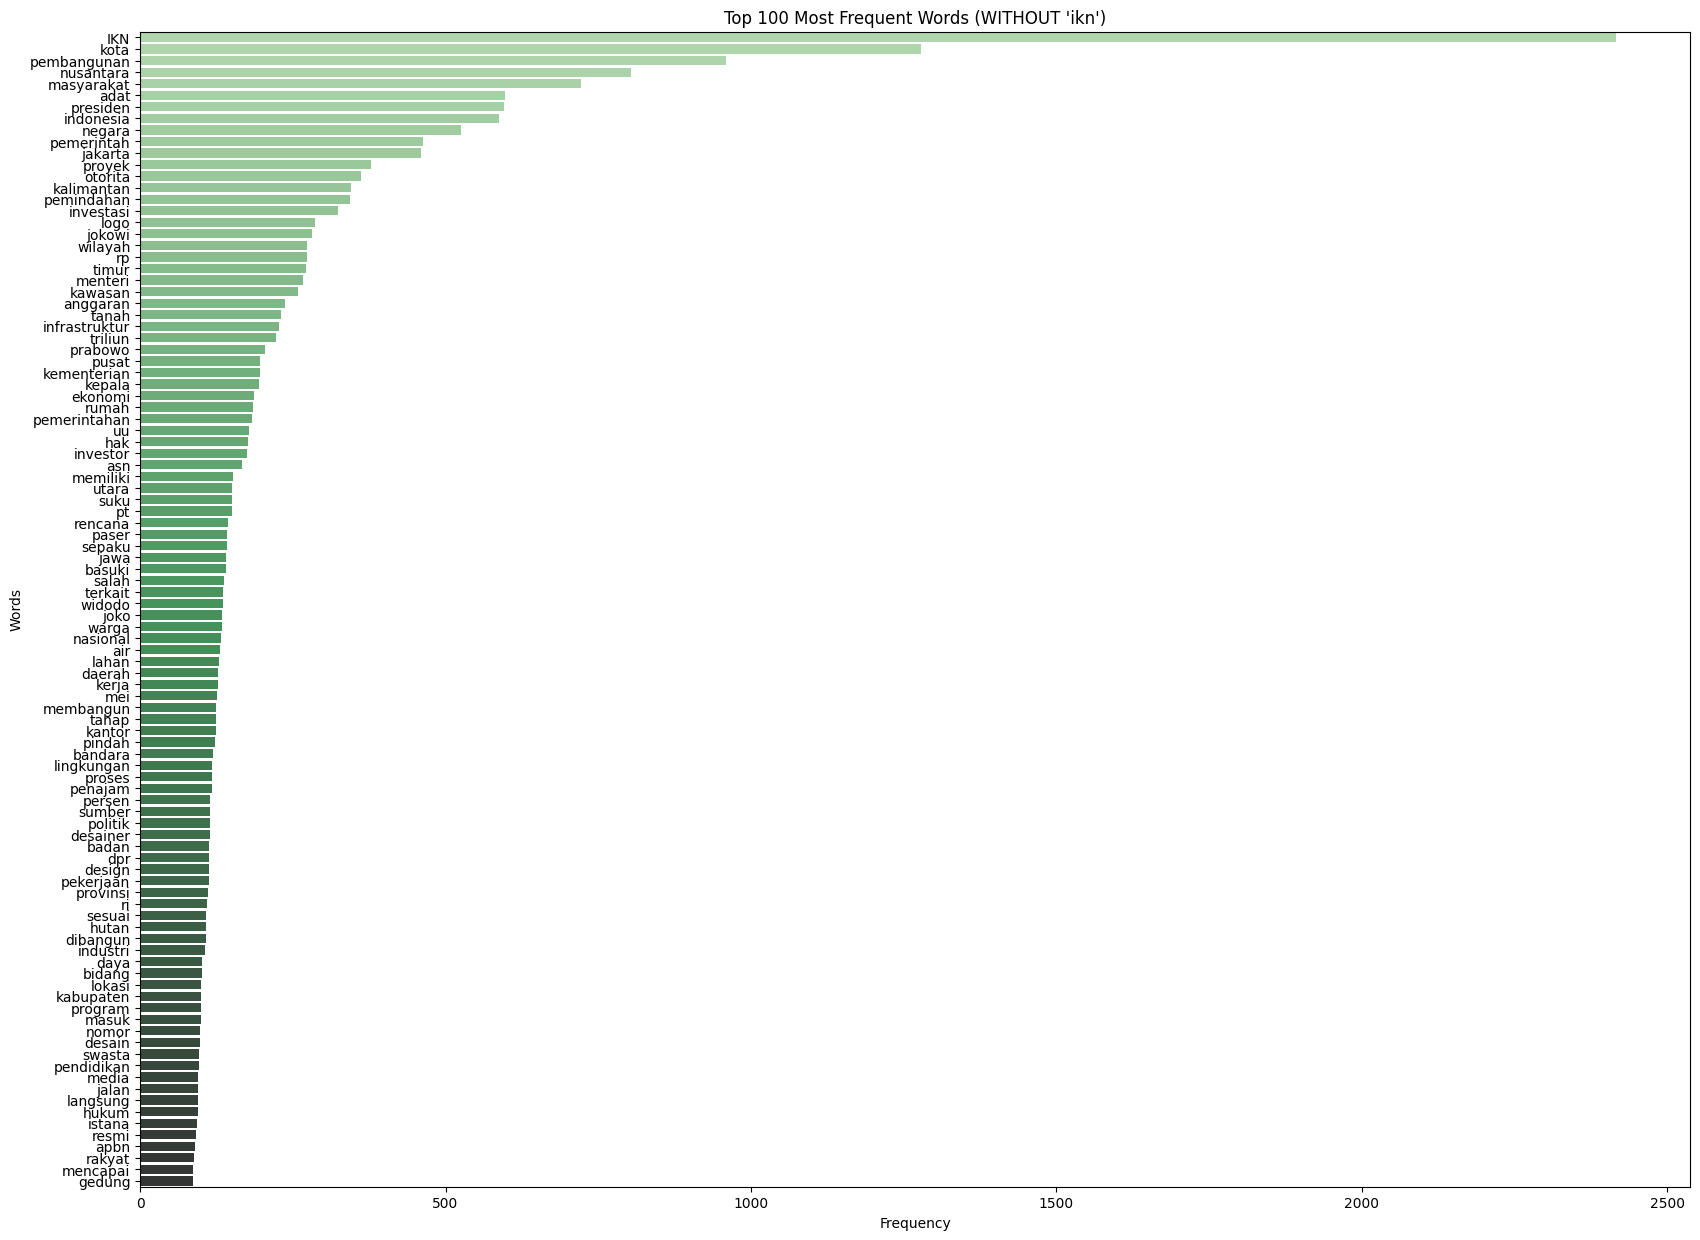

In [ ]:
# Gabungkan semua kata menjadi satu string
all_words_without_ikn = ' '.join(ikn_news_df_with_ikn['content_without_stopwords'])

# Hitung frekuensi kata
word_freq_without_ikn = Counter(all_words_without_ikn.split())
top_100_with_ikn = dict(word_freq_without_ikn.most_common(100))

# Simpan ke DataFrame
top_100_with_ikn_df = pd.DataFrame(top_100_with_ikn.items(), columns=['word', 'frequency'])
top_100_with_ikn_df = top_100_with_ikn_df.sort_values(by='frequency', ascending=False)

# Visualisasi
plt.figure(figsize=(20, 15))
sns.barplot(data=top_100_with_ikn_df, x='frequency', y='word', palette='Greens_d')
plt.title("Top 100 Most Frequent Words (WITHOUT 'ikn')")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [ ]:
# Melihat keseluruhan baris

# Mengatur pandas agar menampilkan seluruh baris DataFrame
pd.set_option('display.max_rows', None)

# Menampilkan seluruh isi DataFrame
print(top_100_with_ikn_df)

# Setelah selesai, Anda bisa mengembalikan pengaturan agar hanya menampilkan sebagian baris
pd.reset_option('display.max_rows')

             word  frequency
0             IKN       2417
1            kota       1278
2     pembangunan        960
3       nusantara        804
4      masyarakat        722
5            adat        597
6        presiden        595
7       indonesia        587
8          negara        526
9      pemerintah        463
10        jakarta        460
11         proyek        378
12        otorita        361
13     kalimantan        345
14     pemindahan        344
15      investasi        324
16           logo        286
17         jokowi        282
18        wilayah        274
19             rp        273
20          timur        271
21        menteri        266
22        kawasan        259
23       anggaran        237
24          tanah        230
25  infrastruktur        228
26        triliun        222
27        prabowo        204
28          pusat        197
29    kementerian        196
30         kepala        194
31        ekonomi        186
32          rumah        185
33   pemerinta

<ipython-input-37-b055f74ce97d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_100_without_ikn_df, x='frequency', y='word', palette='Greens_d')


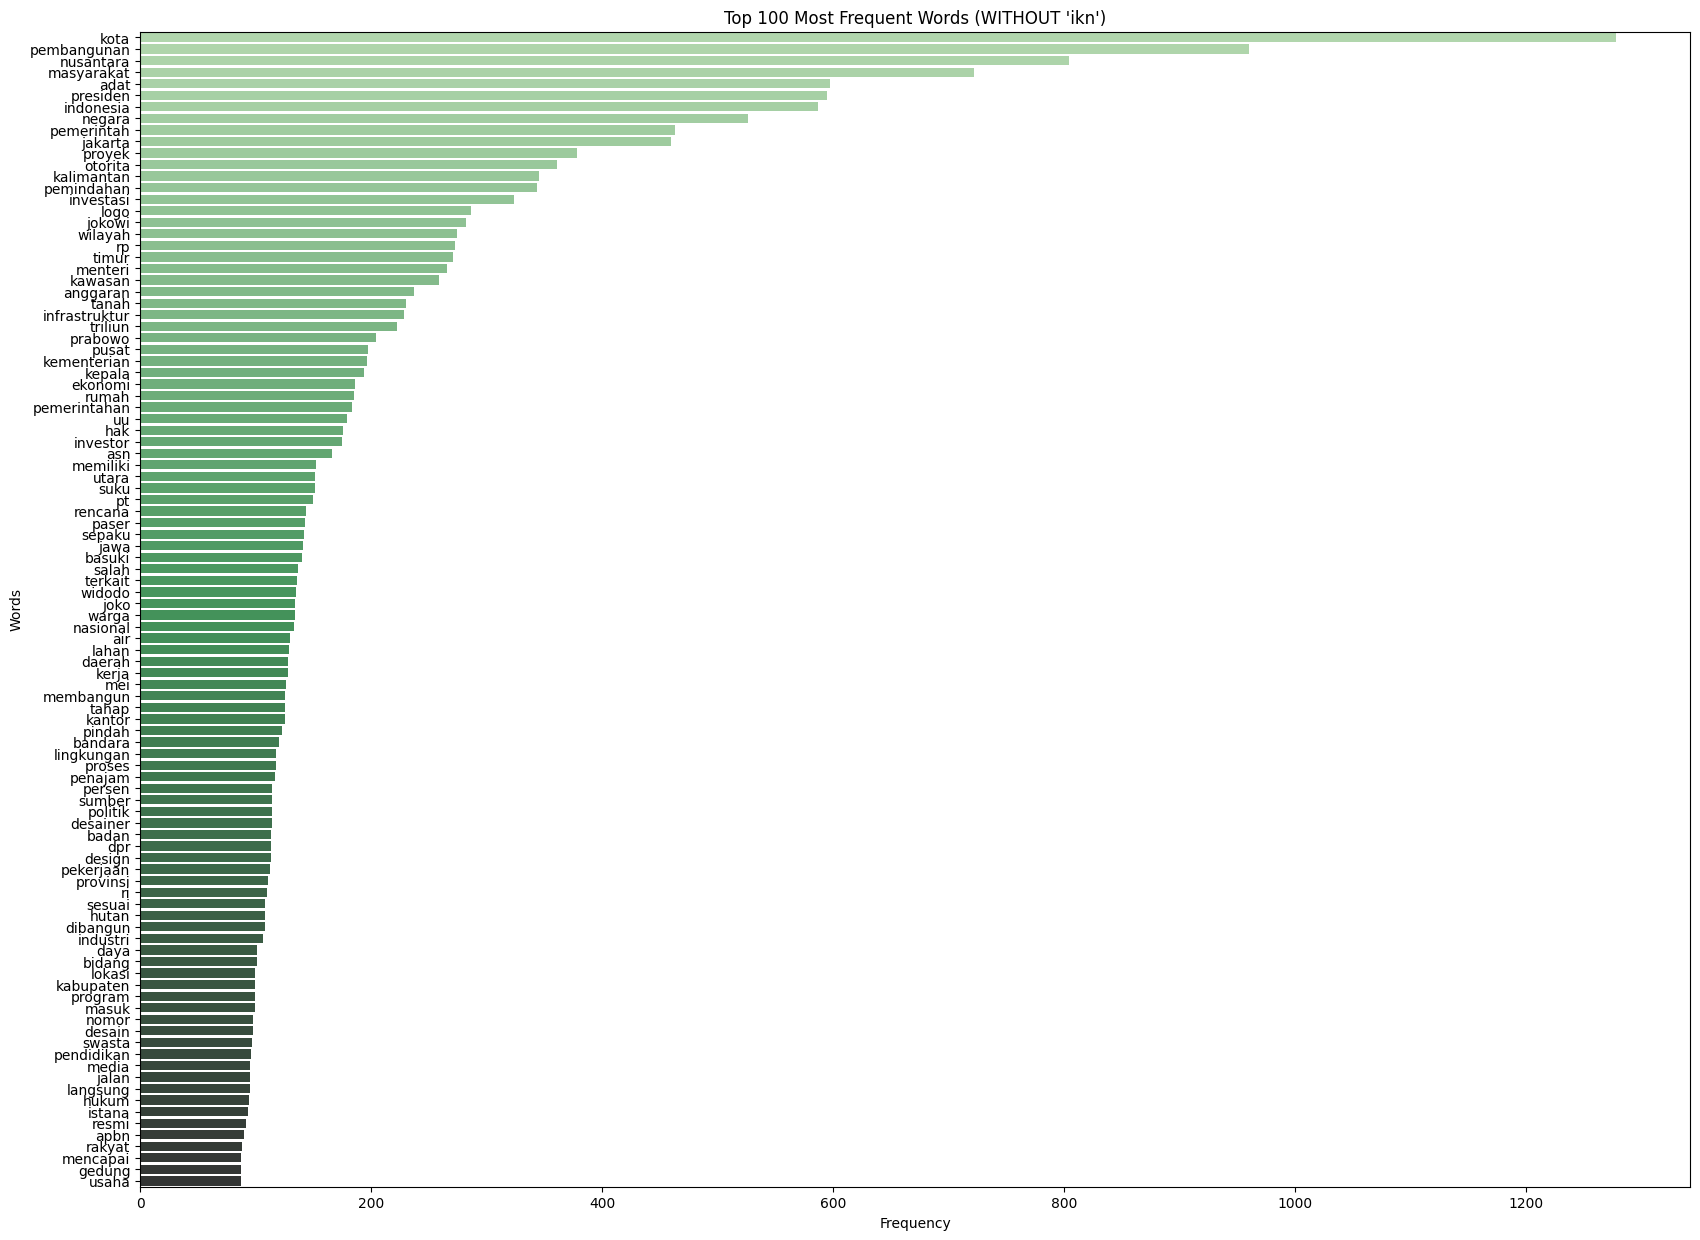

In [ ]:
# Gabungkan semua kata menjadi satu string
all_words_without_ikn = ' '.join(ikn_news_df_without_ikn['content_without_stopwords'])

# Hitung frekuensi kata
word_freq_without_ikn = Counter(all_words_without_ikn.split())
top_100_without_ikn = dict(word_freq_without_ikn.most_common(100))

# Simpan ke DataFrame
top_100_without_ikn_df = pd.DataFrame(top_100_without_ikn.items(), columns=['word', 'frequency'])
top_100_without_ikn_df = top_100_without_ikn_df.sort_values(by='frequency', ascending=False)

# Visualisasi
plt.figure(figsize=(20, 15))
sns.barplot(data=top_100_without_ikn_df, x='frequency', y='word', palette='Greens_d')
plt.title("Top 100 Most Frequent Words (WITHOUT 'ikn')")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [ ]:
# Melihat keseluruhan baris

# Mengatur pandas agar menampilkan seluruh baris DataFrame
pd.set_option('display.max_rows', None)

# Menampilkan seluruh isi DataFrame
print(top_100_without_ikn_df)

# Setelah selesai, Anda bisa mengembalikan pengaturan agar hanya menampilkan sebagian baris
pd.reset_option('display.max_rows')

             word  frequency
0            kota       1278
1     pembangunan        960
2       nusantara        804
3      masyarakat        722
4            adat        597
5        presiden        595
6       indonesia        587
7          negara        526
8      pemerintah        463
9         jakarta        460
10         proyek        378
11        otorita        361
12     kalimantan        345
13     pemindahan        344
14      investasi        324
15           logo        286
16         jokowi        282
17        wilayah        274
18             rp        273
19          timur        271
20        menteri        266
21        kawasan        259
22       anggaran        237
23          tanah        230
24  infrastruktur        228
25        triliun        222
26        prabowo        204
27          pusat        197
28    kementerian        196
29         kepala        194
30        ekonomi        186
31          rumah        185
32   pemerintahan        183
33            

<ipython-input-39-d0c158df2cc0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_with_ikn_df, x='frequency', y='word', palette='viridis')


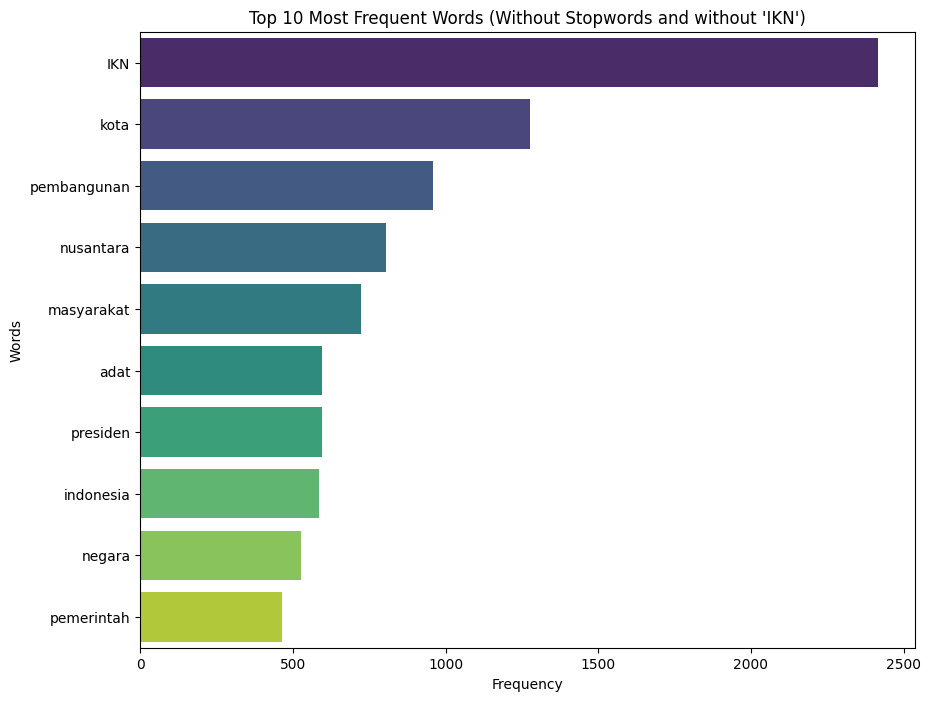

In [ ]:
# Kalau mau ambil top 10 dari tanpa IKN
top_10_with_ikn_df = top_100_with_ikn_df.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_with_ikn_df, x='frequency', y='word', palette='viridis')
plt.title("Top 10 Most Frequent Words (Without Stopwords and without 'IKN')")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


<ipython-input-40-3db092da2916>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_without_ikn_df, x='frequency', y='word', palette='viridis')


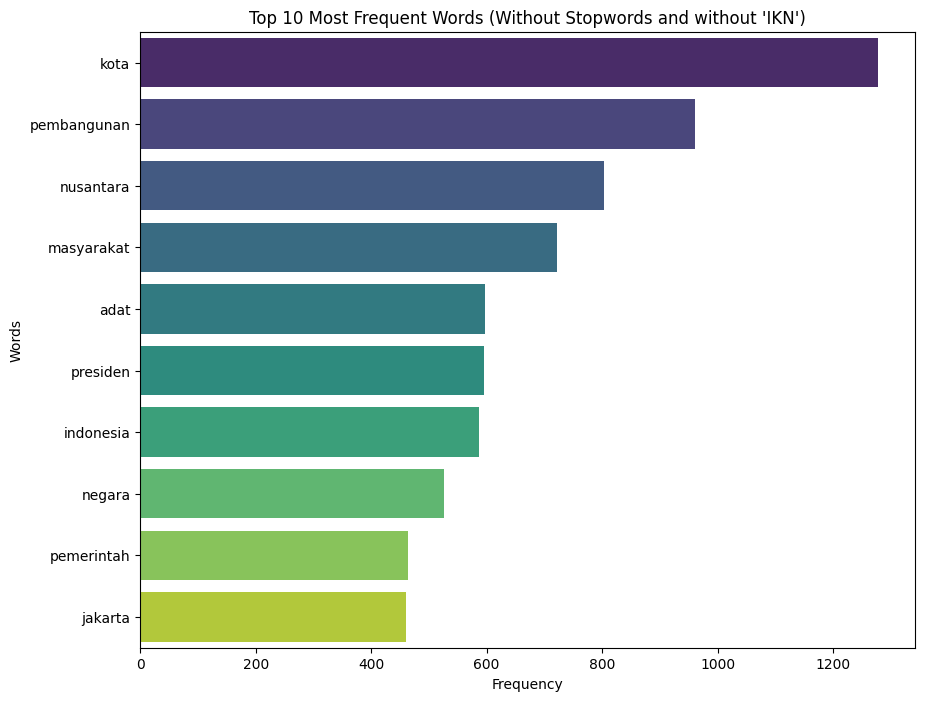

In [ ]:
# Kalau mau ambil top 10 dari tanpa IKN
top_10_without_ikn_df = top_100_without_ikn_df.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_without_ikn_df, x='frequency', y='word', palette='viridis')
plt.title("Top 10 Most Frequent Words (Without Stopwords and without 'IKN')")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


In [ ]:
# Menambahkan kolom wordcount_after_stopwords
ikn_news_df_with_ikn['wordcount_after_stopwords'] = ikn_news_df_with_ikn['content_without_stopwords'].apply(lambda x: len(x.split()))

In [ ]:
ikn_news_df_with_ikn

link  \
0    https://nasional.kompas.com/read/2023/05/21/06...   
1    https://www.cnbcindonesia.com/opini/2024081613...   
2    https://www.kompasiana.com/nurmalitamarinaa/66...   
3    https://www.cnbcindonesia.com/news/20220128201...   
4    https://www.tempo.co/politik/pro-kontra-saat-p...   
..                                                 ...   
186  https://nasional.kompas.com/read/2024/01/25/06...   
187  https://www.kompas.id/baca/bebas-akses/2022/01...   
188  https://www.detik.com/bali/berita/d-7062488/pe...   
189  https://news.detik.com/pemilu/d-7050632/golkar...   
190  https://www.voaindonesia.com/a/kritik-bertubi-...   

                                                 judul         penerbit  \
0                pro kontra pemindahan ibu kota negara           Kompas   
1    pro dan kontra megaproyek nusantara: nyata ata...  CNBC Indonesia​   
2                           pro kontra pembangunan IKN       Kompasiana   
3    pro kontra ibu kota baru ri, simak perdebatan ...  CNBC Indonesia​   
4    pro-kontra saat pemerintah ngotot putuskan rev...            TEMPO   
..                                                 ...              ...   
186  jk cerita terkejut ibu kota negara diputuskan ...           Kompas   
187  agenda tersembunyi dan argumen terhadap kritik...           Kompas   
188  pernyataan lengkap anies kritik IKN timbulkan ...            Detik   
189  golkar heran anies kritik tujuan dan langkah b...            Detik   
190        kritik bertubi terkait ibu kota negara baru    VOA Indonesia   

       tanggal                                            content  \
0   2023-05-21  Pro Kontra Pemindahan Ibu Kota Negara Tim Reda...   
1   2024-08-16  Catatan: Artikel ini merupakan opini pribadi p...   
2   2024-05-14  Saya adalah mahasiswa Fakultas Hukum Universit...   
3   2022-01-28  Jakarta, CNBC Indonesia - Ibu Kota Negara (IKN...   
4   2023-08-22  Scroll ke bawah untuk membaca berita Baca beri...   
..         ...                                                ...   
186 2024-01-25  JK Cerita Terkejut Ibu Kota Negara Diputuskan ...   
187 2022-01-29  Relokasi ibu kota negara selalu penuh pro kont...   
188 2023-11-29  Calon presiden (capres) Anies Baswedan mengkri...   
189 2023-11-22  Capres nomor urut 1, Anies Baswedan, mengkriti...   
190 2022-02-01  Print Rencana pembangunan Ibu Kota Negara (IKN...   

                                       cleaned_content  \
0    pro kontra pemindahan ibu kota negara tim reda...   
1    catatan artikel ini merupakan opini pribadi pe...   
2    saya adalah mahasiswa fakultas hukum universit...   
3    jakarta cnbc indonesia ibu kota negara IKN ind...   
4    scroll ke bawah untuk membaca berita baca beri...   
..                                                 ...   
186  jk cerita terkejut ibu kota negara diputuskan ...   
187  relokasi ibu kota negara selalu penuh pro kont...   
188  calon presiden capres anies baswedan mengkriti...   
189  capres nomor urut anies baswedan mengkritik la...   
190  print rencana pembangunan ibu kota negara IKN ...   

                                                  tags   status  tahun  \
0    Pro Kontra Pemindahan Ibu Kota Negara, Argumen...  success   2023   
1    ibu kota nusantara, nusantara, jokowi, kaliman...  success   2024   
2    kota,pemindahan,pembangunan,ikn nusantara,kebi...  success   2024   
3    ikn, nusantara, bappenas, ibu kota negara, kal...  success   2022   
4                                       Tidak ada tags  success   2023   
..                                                 ...      ...    ...   
186  Jusuf Kalla, pemindahan ibu kota, JK, IKN, IKN...  success   2024   
187  analisis, fenomena, regional, utama, ibu kota ...  success   2022   
188                          anies baswedan,jokowi,ikn  success   2023   
189      anies baswedan,ikn,golkar,pemilu 2024,politik  success   2023   
190  Indonesia, Ibu Kota Negara Nusantara, ibu kota...  success   2022   

     wordCount                       

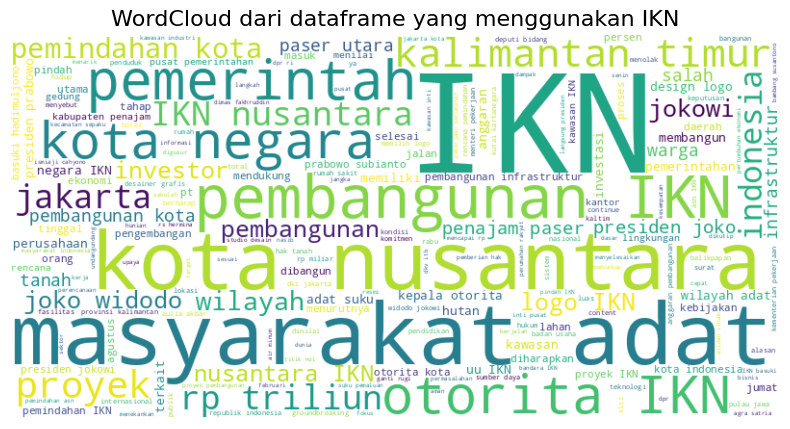

In [ ]:
# Gabungkan semua teks dari kolom 'content_without_stopwords' menjadi satu string
text = ' '.join(ikn_news_df_with_ikn['content_without_stopwords'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu
plt.title('WordCloud dari dataframe yang menggunakan IKN', fontsize=16)
plt.show()

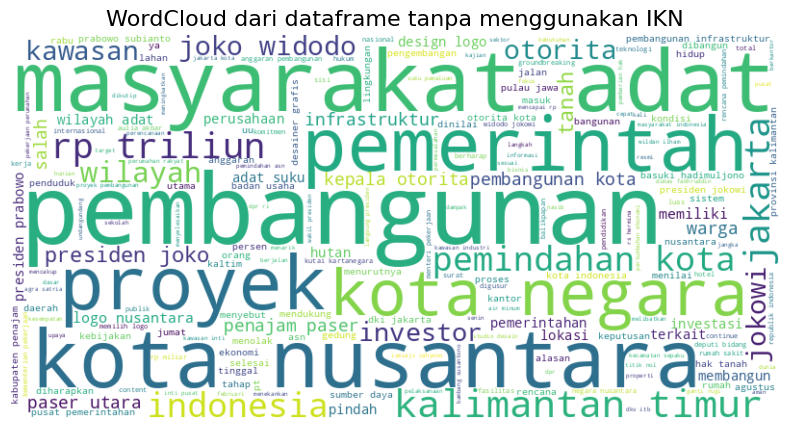

In [ ]:
# Gabungkan semua teks dari kolom 'content_without_stopwords' menjadi satu string
text = ' '.join(ikn_news_df_without_ikn['content_without_stopwords'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu
plt.title('WordCloud dari dataframe tanpa menggunakan IKN', fontsize=16)
plt.show()

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'ikn_news_df_after_stopwords.csv'
ikn_news_df_with_ikn.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke ikn_news_df_after_stopwords.csv


In [ ]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'ikn_news_df_after_stopwords.xlsx'
ikn_news_df_with_ikn.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke ikn_news_df_after_stopwords.xlsx


## Stemming

In [ ]:
# Mengunduh library untuk stemming Bahasa Indonesia
!pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.5 MB/s eta 0:00:00


In [ ]:
# Import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Fungsi untuk stemming
def stemming_indonesia(text):
    if text is not None:
        # Lakukan stemming dan kembalikan hasilnya
        return stemmer.stem(text)
    return ''

In [ ]:
# Terapkan stemming pada kolom 'content_without_stopwords'
ikn_news_df_with_ikn['content_stem_without_stopwords'] = ikn_news_df_with_ikn['content_without_stopwords'].apply(stemming_indonesia)

# Menampilkan hasil untuk beberapa baris
ikn_news_df_with_ikn.loc[0:3, ['content_without_stopwords', 'content_stem_without_stopwords']]

content_without_stopwords  \
0  pro kontra pemindahan kota negara tim redaksi ...   
1  catatan artikel opini pribadi penulis mencermi...   
2  mahasiswa fakultas hukum universitas jember mi...   
3  jakarta cnbc indonesia kota negara IKN indones...   

                      content_stem_without_stopwords  
0  pro kontra pindah kota negara tim redaksi kota...  
1  catat artikel opini pribadi tulis cermin panda...  
2  mahasiswa fakultas hukum universitas jember mi...  
3  jakarta cnbc indonesia kota negara ikn indones...

In [ ]:
# Terapkan stemming pada kolom 'content_without_stopwords'
ikn_news_df_without_ikn['content_stem_without_stopwords'] = ikn_news_df_without_ikn['content_without_stopwords'].apply(stemming_indonesia)

# Menampilkan hasil untuk beberapa baris
ikn_news_df_without_ikn.loc[0:3, ['content_without_stopwords', 'content_stem_without_stopwords']]

content_without_stopwords  \
0  pro kontra pemindahan kota negara tim redaksi ...   
1  catatan artikel opini pribadi penulis mencermi...   
2  mahasiswa fakultas hukum universitas jember mi...   
3  jakarta cnbc indonesia kota negara indonesia r...   

                      content_stem_without_stopwords  
0  pro kontra pindah kota negara tim redaksi kota...  
1  catat artikel opini pribadi tulis cermin panda...  
2  mahasiswa fakultas hukum universitas jember mi...  
3  jakarta cnbc indonesia kota negara indonesia r...

In [ ]:
ikn_news_df_with_ikn['wordcount_stem_without_stopwords'] = ikn_news_df_with_ikn['content_stem_without_stopwords'].apply(lambda x: len(x.split()))

In [ ]:
ikn_news_df_with_ikn.loc[:,['judul', 'content', 'wordCount', 'content_stem_without_stopwords', 'wordcount_stem_without_stopwords']]

judul  \
0                pro kontra pemindahan ibu kota negara   
1    pro dan kontra megaproyek nusantara: nyata ata...   
2                           pro kontra pembangunan IKN   
3    pro kontra ibu kota baru ri, simak perdebatan ...   
4    pro-kontra saat pemerintah ngotot putuskan rev...   
..                                                 ...   
186  jk cerita terkejut ibu kota negara diputuskan ...   
187  agenda tersembunyi dan argumen terhadap kritik...   
188  pernyataan lengkap anies kritik IKN timbulkan ...   
189  golkar heran anies kritik tujuan dan langkah b...   
190        kritik bertubi terkait ibu kota negara baru   

                                               content  wordCount  \
0    Pro Kontra Pemindahan Ibu Kota Negara Tim Reda...        547   
1    Catatan: Artikel ini merupakan opini pribadi p...       1616   
2    Saya adalah mahasiswa Fakultas Hukum Universit...        720   
3    Jakarta, CNBC Indonesia - Ibu Kota Negara (IKN...        577   
4    Scroll ke bawah untuk membaca berita Baca beri...        868   
..                                                 ...        ...   
186  JK Cerita Terkejut Ibu Kota Negara Diputuskan ...        420   
187  Relokasi ibu kota negara selalu penuh pro kont...       1526   
188  Calon presiden (capres) Anies Baswedan mengkri...        415   
189  Capres nomor urut 1, Anies Baswedan, mengkriti...        355   
190  Print Rencana pembangunan Ibu Kota Negara (IKN...       1029   

                        content_stem_without_stopwords  \
0    pro kontra pindah kota negara tim redaksi kota...   
1    catat artikel opini pribadi tulis cermin panda...   
2    mahasiswa fakultas hukum universitas jember mi...   
3    jakarta cnbc indonesia kota negara ikn indones...   
4    baca agustus wib dengar artikel bagi gabung te...   
..                                                 ...   
186  jk cerita kejut kota negara putus pindah dialo...   
187  relokasi kota negara penuh pro kontra bukti ga...   
188  calon presiden capres anies baswedan kritisi b...   
189  capres nomor urut anies baswedan kritik langka...   
190  print rencana bangun kota negara ikn najam pas...   

     wordcount_stem_without_stopwords  
0                                 322  
1                                 985  
2                                 403  
3                                 315  
4                                 542  
..                                ...  
186                               216  
187                               896  
188                               213  
189                               187  
190                               573  

[191 rows x 5 columns]

<ipython-input-54-197028d16c20>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='viridis')


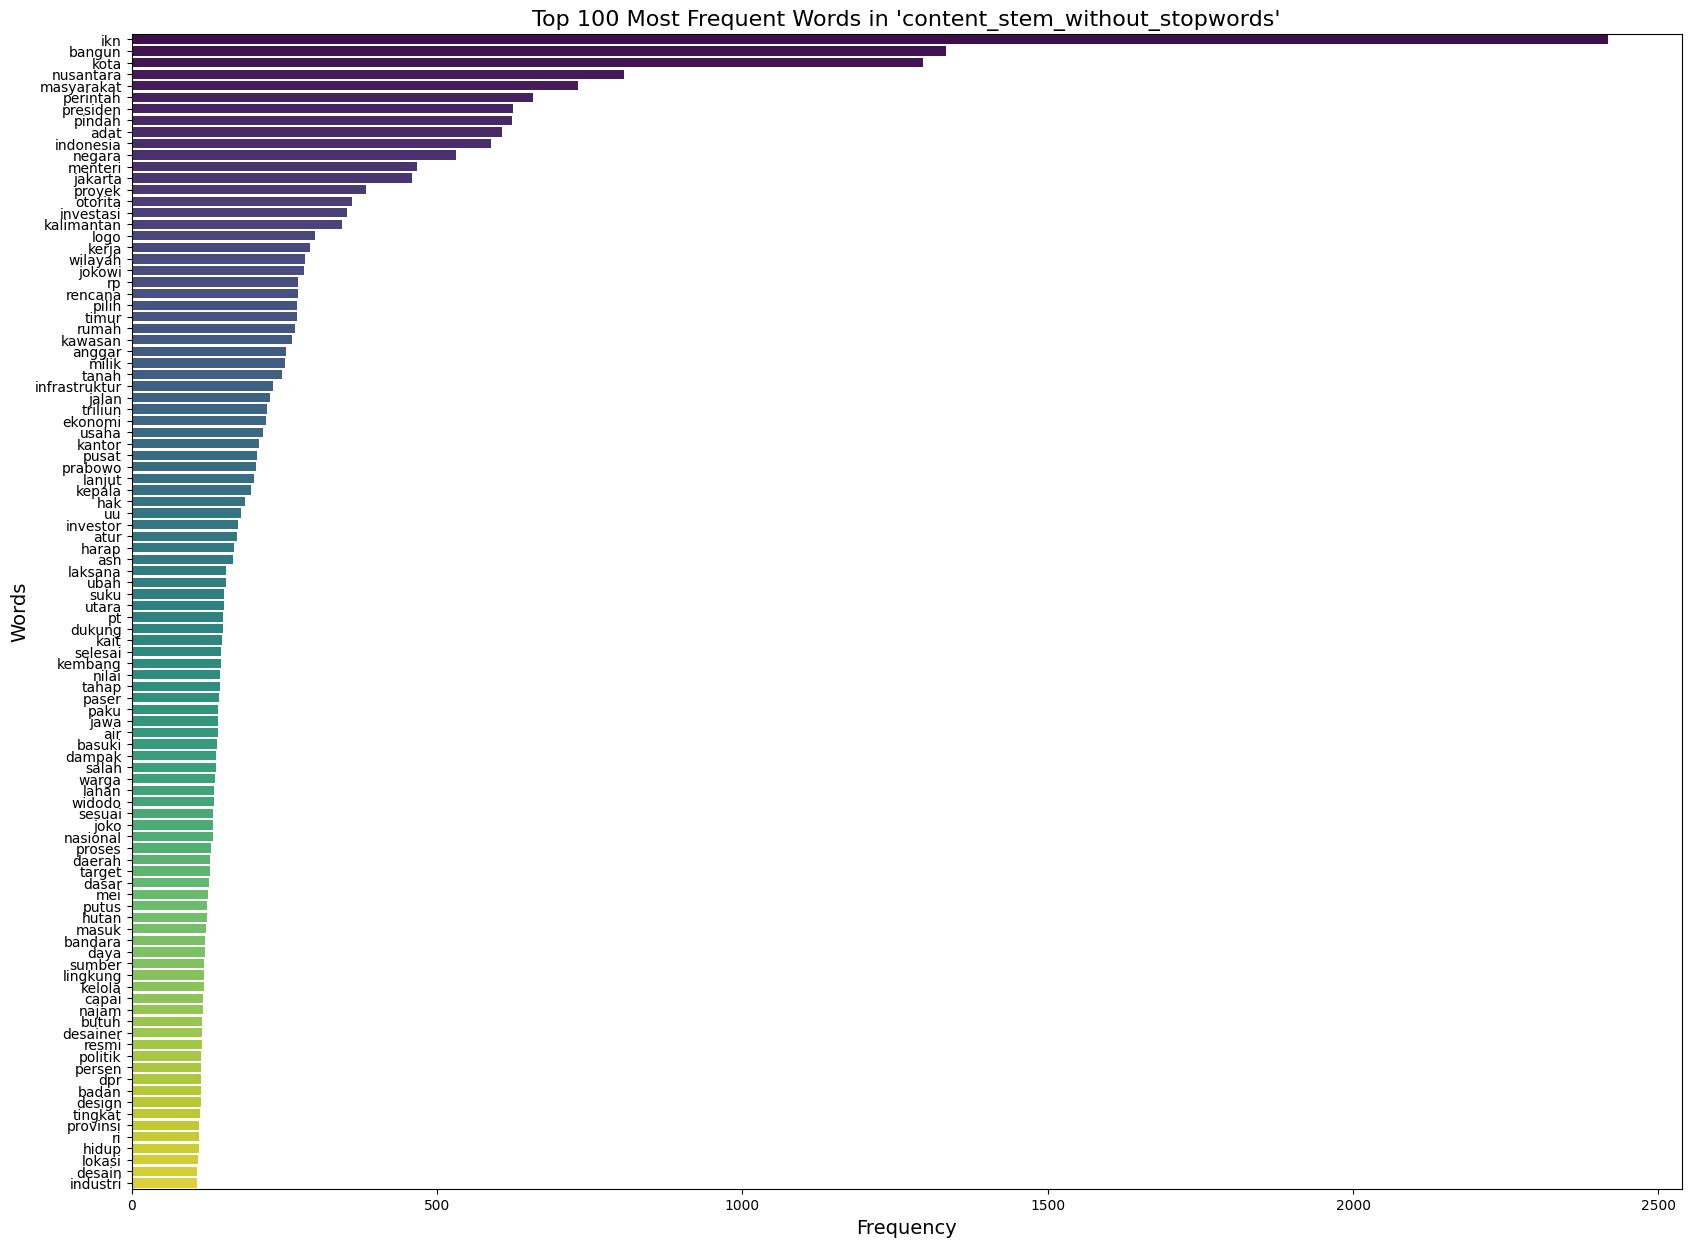

In [ ]:
from collections import Counter

# Gabungkan semua teks dalam kolom 'content_stem_without_stopwords' menjadi satu string
all_words = ' '.join(ikn_news_df_with_ikn['content_stem_without_stopwords'].tolist())

# Pisahkan string menjadi daftar kata
word_list = all_words.split()

# Hitung frekuensi kata
word_freq = Counter(word_list)

# Konversi hasil ke DataFrame
freq_stem_without_stopwords = pd.DataFrame(word_freq.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

# Ambil top 100 kata yang paling sering muncul
top_n = 100
top_words = freq_stem_without_stopwords.head(top_n)

# Plot hasil frekuensi kata
plt.figure(figsize=(20, 15))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in 'content_stem_without_stopwords'", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

<ipython-input-55-e8ea04c4a716>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='viridis')


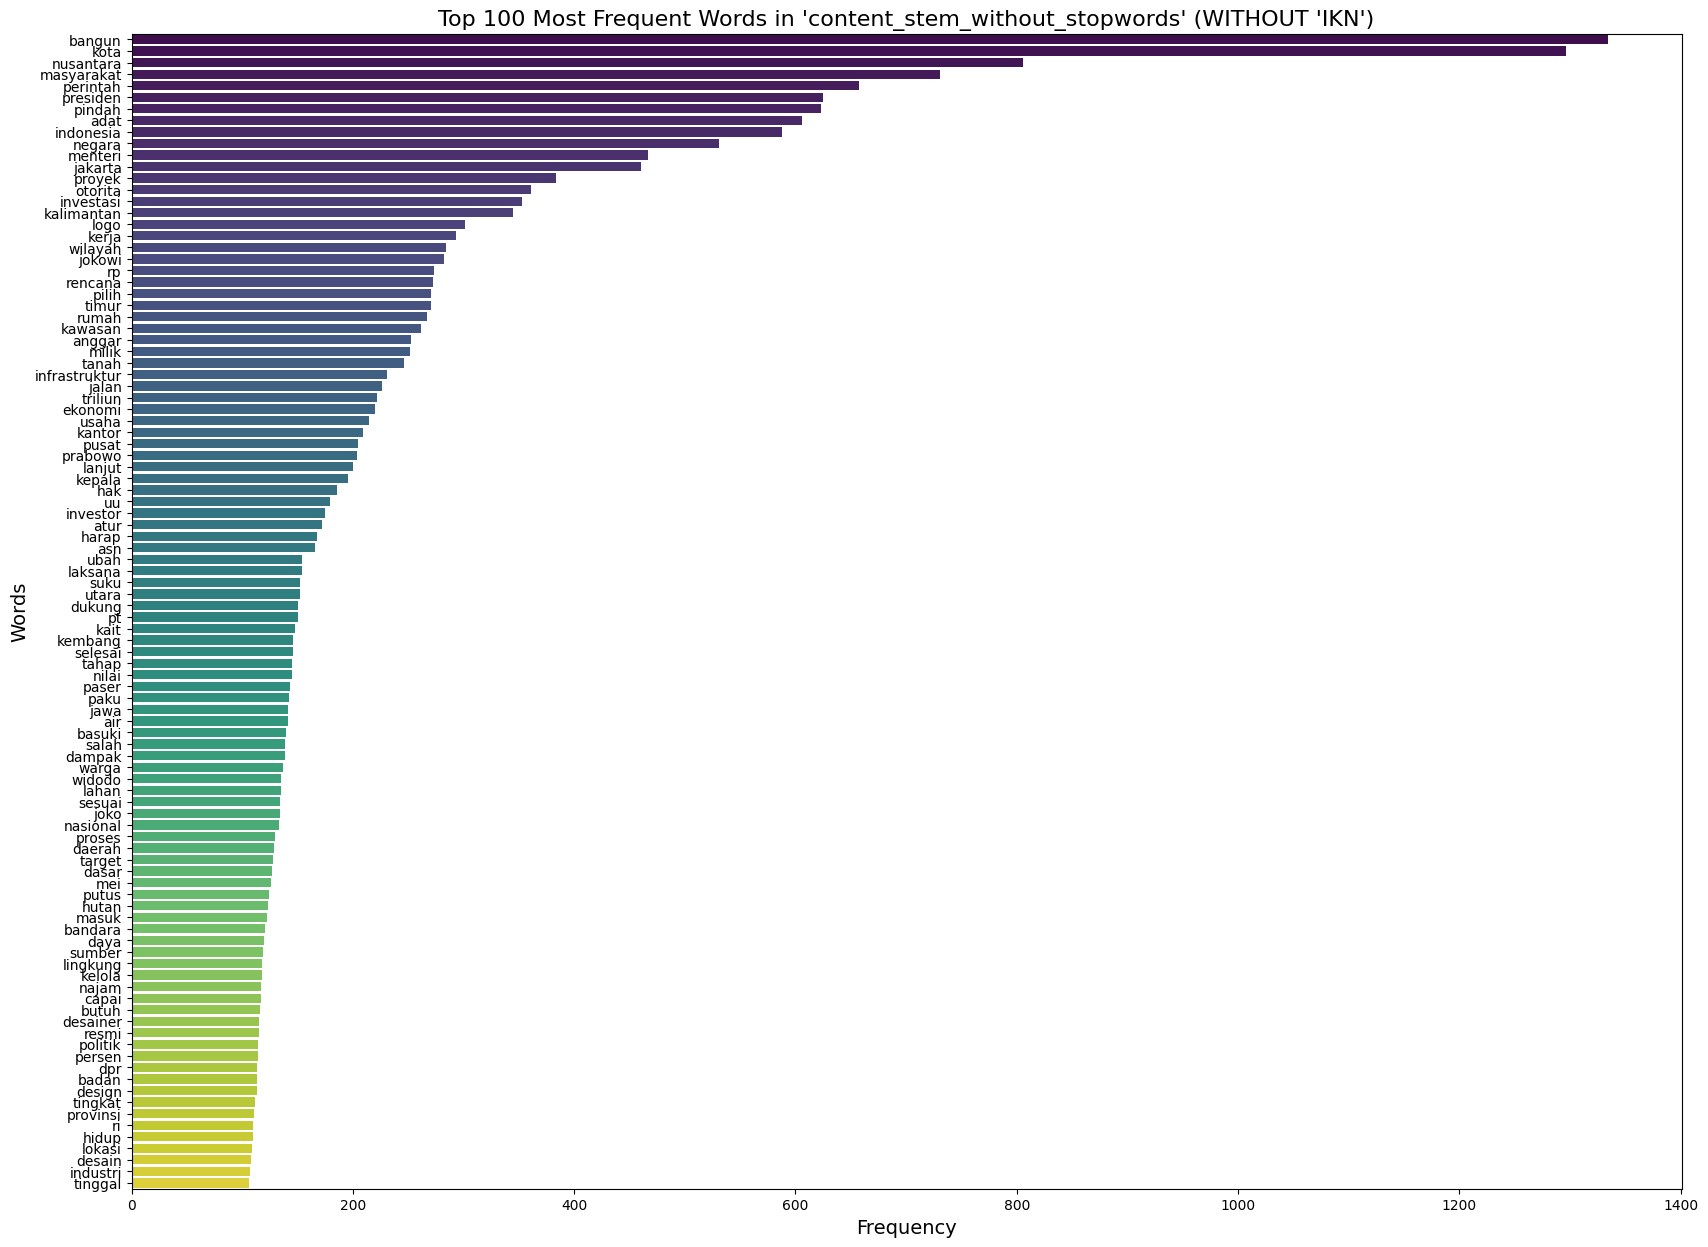

In [ ]:

# Gabungkan semua teks dalam kolom 'content_stem_without_stopwords' dari DataFrame TANPA IKN
all_words = ' '.join(ikn_news_df_without_ikn['content_stem_without_stopwords'].tolist())

# Pisahkan string menjadi daftar kata
word_list = all_words.split()

# Hitung frekuensi kata
word_freq = Counter(word_list)

# Konversi hasil ke DataFrame
freq_stem_without_stopwords = pd.DataFrame(word_freq.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

# Ambil top 100 kata yang paling sering muncul
top_n = 100
top_words = freq_stem_without_stopwords.head(top_n)

# Plot hasil frekuensi kata
plt.figure(figsize=(20, 15))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in 'content_stem_without_stopwords' (WITHOUT 'IKN')", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

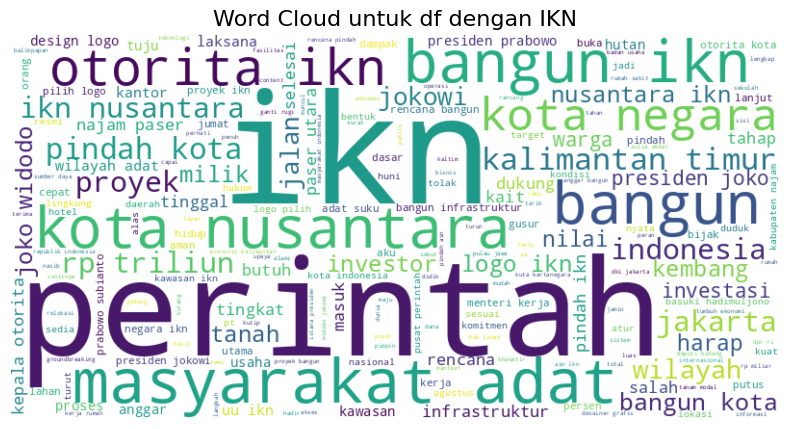

In [ ]:
# Buat Word Cloud untuk 'content_stem_without_stopwords'
wordcloud_stem = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ikn_news_df_with_ikn['content_stem_without_stopwords']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stem, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk df dengan IKN', fontsize=16)
plt.show()

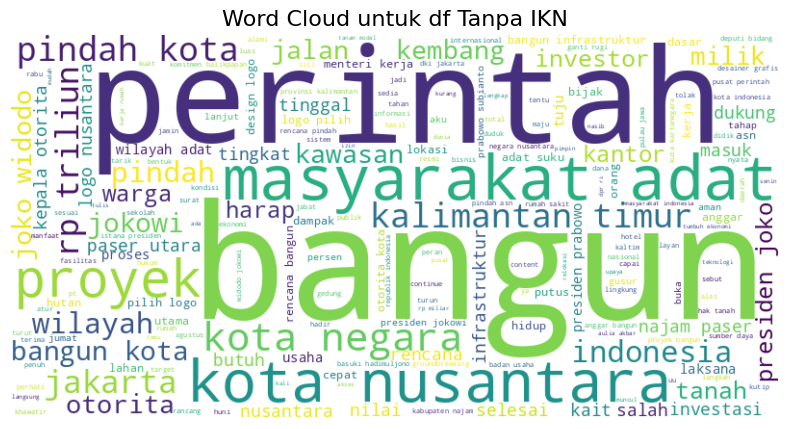

In [ ]:
# Buat Word Cloud untuk 'content_stem_without_stopwords'
wordcloud_stem_without_ikn = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ikn_news_df_without_ikn['content_stem_without_stopwords']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stem_without_ikn, interpolation='bilinear')  # <-- Ini sudah benar!
plt.axis('off')
plt.title('Word Cloud untuk df Tanpa IKN', fontsize=16)
plt.show()

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'ikn_news_df_after_stopwords_stemming.csv'
ikn_news_df_with_ikn.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke ikn_news_df_after_stopwords_stemming.csv


In [ ]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'ikn_news_df_after_stopwords_stemming.xlsx'
ikn_news_df_with_ikn.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke ikn_news_df_after_stopwords_stemming.xlsx


## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

# Unduh data yang diperlukan untuk lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

# Buat objek lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Fungsi untuk melakukan lemmatization
def lemmatize_indonesia(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [ ]:
# Terapkan lemmatization pada kolom 'content_without_stopwords'
ikn_news_df_with_ikn['content_lemmatized'] = ikn_news_df_with_ikn['content_stem_without_stopwords'].apply(lemmatize_indonesia)

# Terapkan lemmatization pada kolom 'content_without_stopwords'
ikn_news_df_without_ikn['content_lemmatized'] = ikn_news_df_without_ikn['content_stem_without_stopwords'].apply(lemmatize_indonesia)

# Menampilkan hasil untuk beberapa baris
ikn_news_df_with_ikn.loc[0:3, ['content_stem_without_stopwords', 'content_lemmatized']]

content_stem_without_stopwords  \
0  pro kontra pindah kota negara tim redaksi kota...   
1  catat artikel opini pribadi tulis cermin panda...   
2  mahasiswa fakultas hukum universitas jember mi...   
3  jakarta cnbc indonesia kota negara ikn indones...   

                                  content_lemmatized  
0  pro kontra pindah kota negara tim redaksi kota...  
1  catat artikel opini pribadi tulis cermin panda...  
2  mahasiswa fakultas hukum universitas jember mi...  
3  jakarta cnbc indonesia kota negara ikn indones...

In [ ]:
ikn_news_df_with_ikn['wordcount_lemmatized'] = ikn_news_df_with_ikn['content_lemmatized'].apply(lambda x: len(x.split()))

In [ ]:
ikn_news_df_with_ikn.loc[:,['judul', 'content', 'wordCount', 'content_lemmatized', 'wordcount_lemmatized']]

judul  \
0                pro kontra pemindahan ibu kota negara   
1    pro dan kontra megaproyek nusantara: nyata ata...   
2                           pro kontra pembangunan IKN   
3    pro kontra ibu kota baru ri, simak perdebatan ...   
4    pro-kontra saat pemerintah ngotot putuskan rev...   
..                                                 ...   
186  jk cerita terkejut ibu kota negara diputuskan ...   
187  agenda tersembunyi dan argumen terhadap kritik...   
188  pernyataan lengkap anies kritik IKN timbulkan ...   
189  golkar heran anies kritik tujuan dan langkah b...   
190        kritik bertubi terkait ibu kota negara baru   

                                               content  wordCount  \
0    Pro Kontra Pemindahan Ibu Kota Negara Tim Reda...        547   
1    Catatan: Artikel ini merupakan opini pribadi p...       1616   
2    Saya adalah mahasiswa Fakultas Hukum Universit...        720   
3    Jakarta, CNBC Indonesia - Ibu Kota Negara (IKN...        577   
4    Scroll ke bawah untuk membaca berita Baca beri...        868   
..                                                 ...        ...   
186  JK Cerita Terkejut Ibu Kota Negara Diputuskan ...        420   
187  Relokasi ibu kota negara selalu penuh pro kont...       1526   
188  Calon presiden (capres) Anies Baswedan mengkri...        415   
189  Capres nomor urut 1, Anies Baswedan, mengkriti...        355   
190  Print Rencana pembangunan Ibu Kota Negara (IKN...       1029   

                                    content_lemmatized  wordcount_lemmatized  
0    pro kontra pindah kota negara tim redaksi kota...                   322  
1    catat artikel opini pribadi tulis cermin panda...                   985  
2    mahasiswa fakultas hukum universitas jember mi...                   403  
3    jakarta cnbc indonesia kota negara ikn indones...                   315  
4    baca agustus wib dengar artikel bagi gabung te...                   542  
..                                                 ...                   ...  
186  jk cerita kejut kota negara putus pindah dialo...                   216  
187  relokasi kota negara penuh pro kontra bukti ga...                   896  
188  calon presiden capres anies baswedan kritisi b...                   213  
189  capres nomor urut anies baswedan kritik langka...                   187  
190  print rencana bangun kota negara ikn najam pas...                   573  

[191 rows x 5 columns]

In [ ]:
# Fungsi untuk menghitung frekuensi kata
def get_word_frequencies(text_series):
    # Gabungkan semua teks dalam satu string
    all_words = ' '.join(text_series).split()
    # Hitung frekuensi kata menggunakan Counter
    word_counts = Counter(all_words)
    # Konversi ke DataFrame
    freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
    return freq_df

In [ ]:
# Hitung frekuensi untuk kolom 'content_lemmatized'
freq_lemmatized = get_word_frequencies(ikn_news_df_with_ikn['content_lemmatized'])
freq_lemmatized.sort_values(by='count', ascending=False, inplace=True)

<ipython-input-67-31e0c074054d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='viridis')


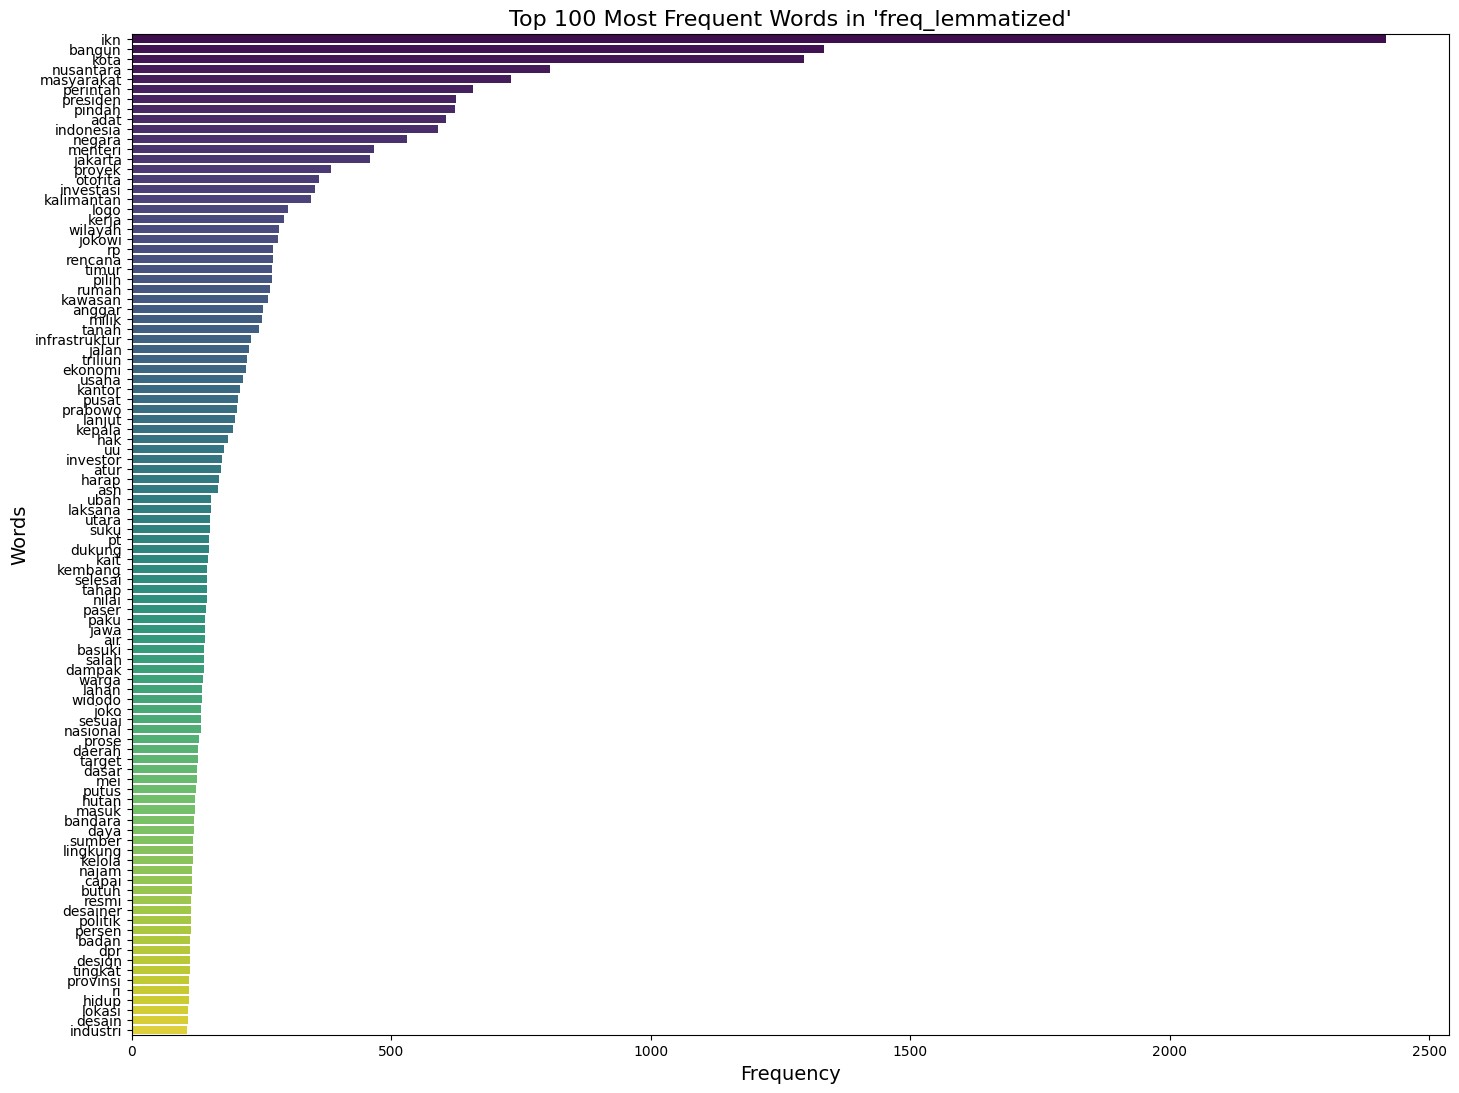

In [ ]:
# Ambil top 100 kata yang paling sering muncul
top_n = 100
top_words = freq_lemmatized.head(top_n)

# Plot hasil frekuensi kata
plt.figure(figsize=(17, 13))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in 'freq_lemmatized'", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

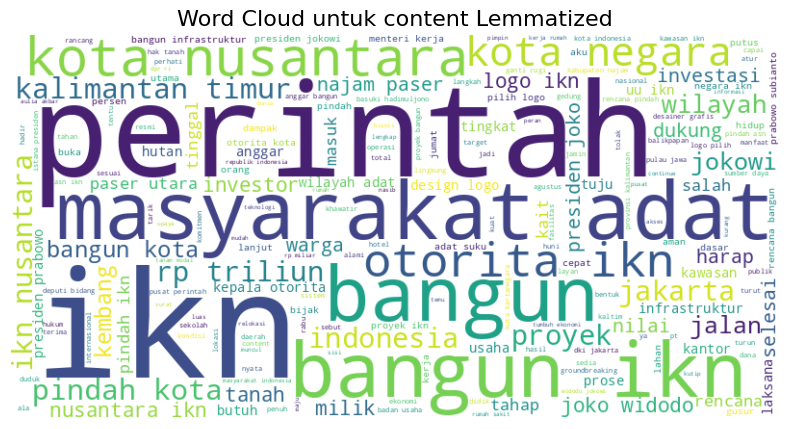

In [ ]:
wordcloud_lemmatized = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ikn_news_df_with_ikn['content_lemmatized']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_lemmatized, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk content Lemmatized', fontsize=16)
plt.show()


In [ ]:
# Hitung frekuensi untuk kolom 'content_lemmatized'
freq_lemmatized_without_ikn = get_word_frequencies(ikn_news_df_without_ikn['content_lemmatized'])
freq_lemmatized_without_ikn.sort_values(by='count', ascending=False, inplace=True)

<ipython-input-70-6c8f783d86c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_without_ikn, palette='viridis')


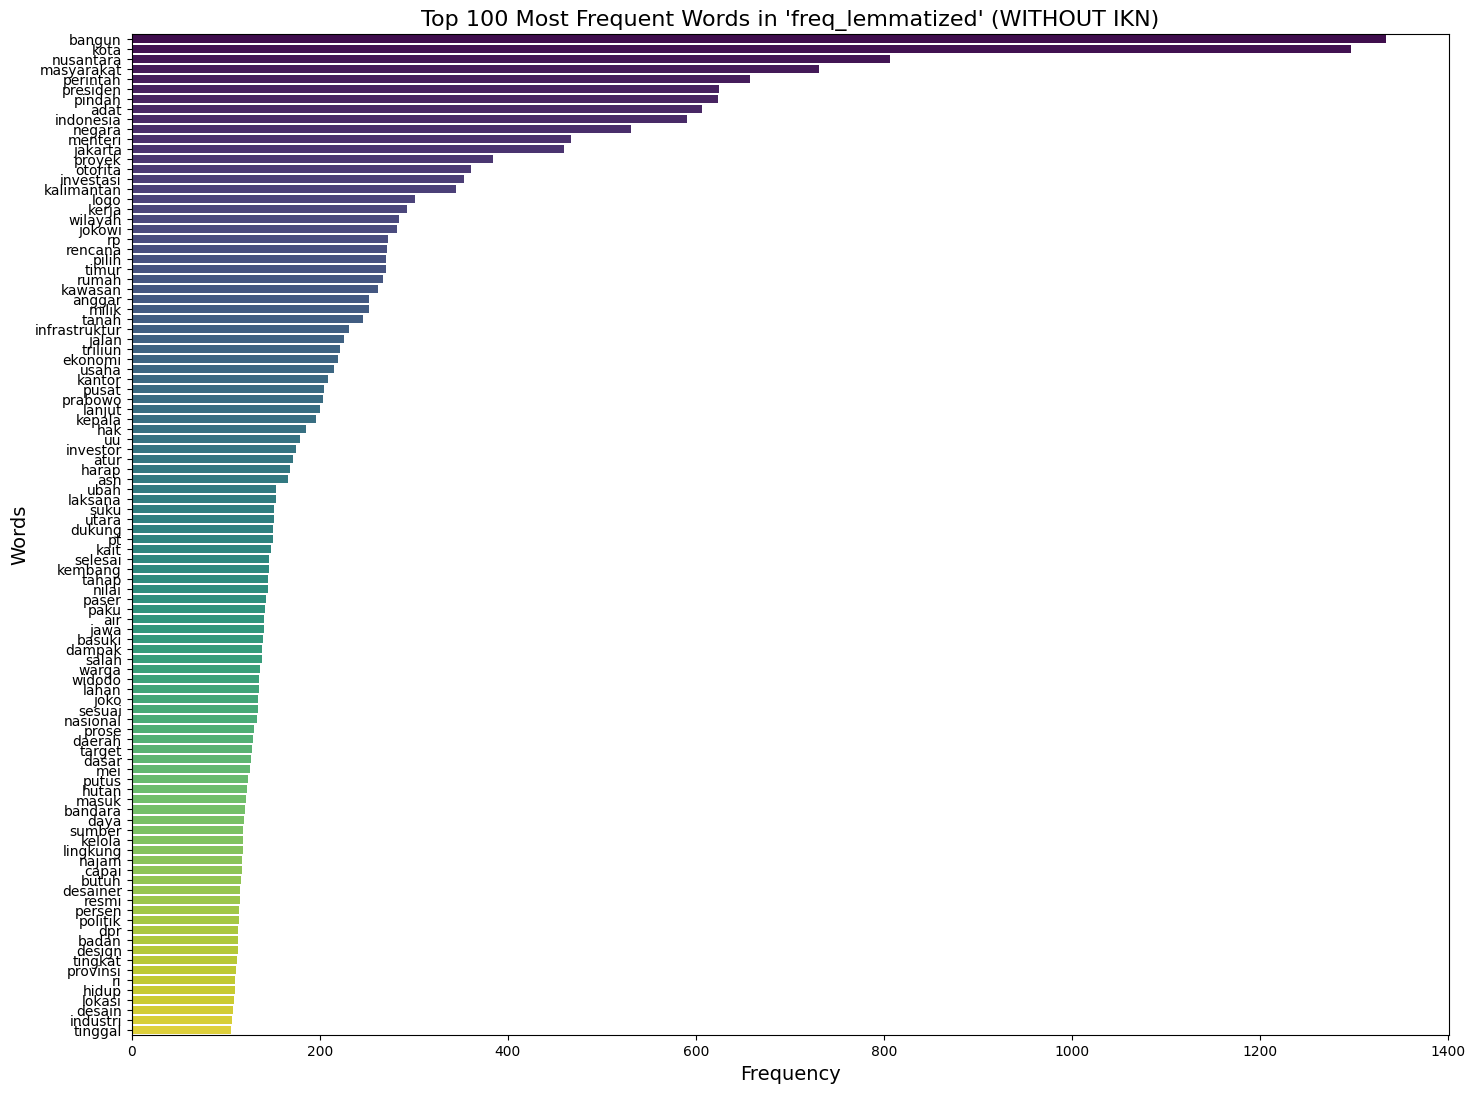

In [ ]:
# Ambil top 100 kata yang paling sering muncul dari data TANPA IKN
top_n = 100
top_words_without_ikn = freq_lemmatized_without_ikn.head(top_n)

# Plot hasil frekuensi kata
plt.figure(figsize=(17, 13))
sns.barplot(x='count', y='word', data=top_words_without_ikn, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in 'freq_lemmatized' (WITHOUT IKN)", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()


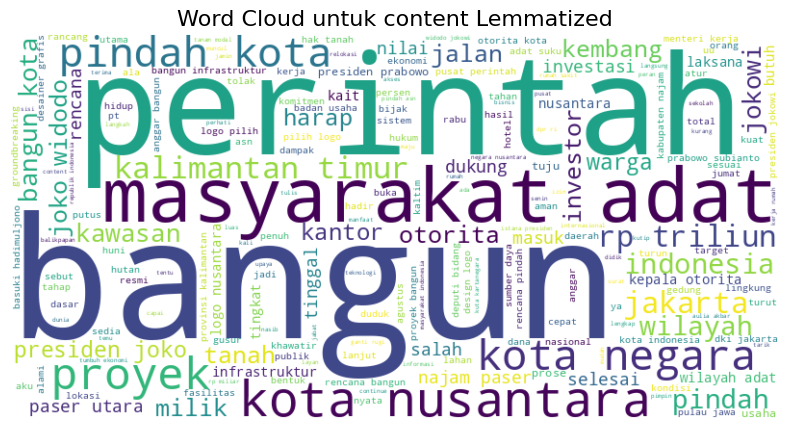

In [ ]:
wordcloud_lemmatized = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ikn_news_df_without_ikn['content_lemmatized']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_lemmatized, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk content Lemmatized', fontsize=16)
plt.show()


In [ ]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'ikn_news_df_after_stopwords_lemm.csv'
ikn_news_df_with_ikn.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke ikn_news_df_after_stopwords_lemm.csv


In [ ]:
# Menyimpan DataFrame ke file Excel
ikn_news_df_with_ikn.to_excel('ikn_news_df_after_stopwords_lemm.xlsx', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke ikn_news_df_after_stopwords_lemm.xlsx")

DataFrame berhasil disimpan ke ikn_news_df_after_stopwords_lemm.xlsx


In [ ]:
ikn_news_df_with_ikn

link  \
0    https://nasional.kompas.com/read/2023/05/21/06...   
1    https://www.cnbcindonesia.com/opini/2024081613...   
2    https://www.kompasiana.com/nurmalitamarinaa/66...   
3    https://www.cnbcindonesia.com/news/20220128201...   
4    https://www.tempo.co/politik/pro-kontra-saat-p...   
..                                                 ...   
186  https://nasional.kompas.com/read/2024/01/25/06...   
187  https://www.kompas.id/baca/bebas-akses/2022/01...   
188  https://www.detik.com/bali/berita/d-7062488/pe...   
189  https://news.detik.com/pemilu/d-7050632/golkar...   
190  https://www.voaindonesia.com/a/kritik-bertubi-...   

                                                 judul         penerbit  \
0                pro kontra pemindahan ibu kota negara           Kompas   
1    pro dan kontra megaproyek nusantara: nyata ata...  CNBC Indonesia​   
2                           pro kontra pembangunan IKN       Kompasiana   
3    pro kontra ibu kota baru ri, simak perdebatan ...  CNBC Indonesia​   
4    pro-kontra saat pemerintah ngotot putuskan rev...            TEMPO   
..                                                 ...              ...   
186  jk cerita terkejut ibu kota negara diputuskan ...           Kompas   
187  agenda tersembunyi dan argumen terhadap kritik...           Kompas   
188  pernyataan lengkap anies kritik IKN timbulkan ...            Detik   
189  golkar heran anies kritik tujuan dan langkah b...            Detik   
190        kritik bertubi terkait ibu kota negara baru    VOA Indonesia   

       tanggal                                            content  \
0   2023-05-21  Pro Kontra Pemindahan Ibu Kota Negara Tim Reda...   
1   2024-08-16  Catatan: Artikel ini merupakan opini pribadi p...   
2   2024-05-14  Saya adalah mahasiswa Fakultas Hukum Universit...   
3   2022-01-28  Jakarta, CNBC Indonesia - Ibu Kota Negara (IKN...   
4   2023-08-22  Scroll ke bawah untuk membaca berita Baca beri...   
..         ...                                                ...   
186 2024-01-25  JK Cerita Terkejut Ibu Kota Negara Diputuskan ...   
187 2022-01-29  Relokasi ibu kota negara selalu penuh pro kont...   
188 2023-11-29  Calon presiden (capres) Anies Baswedan mengkri...   
189 2023-11-22  Capres nomor urut 1, Anies Baswedan, mengkriti...   
190 2022-02-01  Print Rencana pembangunan Ibu Kota Negara (IKN...   

                                       cleaned_content  \
0    pro kontra pemindahan ibu kota negara tim reda...   
1    catatan artikel ini merupakan opini pribadi pe...   
2    saya adalah mahasiswa fakultas hukum universit...   
3    jakarta cnbc indonesia ibu kota negara IKN ind...   
4    scroll ke bawah untuk membaca berita baca beri...   
..                                                 ...   
186  jk cerita terkejut ibu kota negara diputuskan ...   
187  relokasi ibu kota negara selalu penuh pro kont...   
188  calon presiden capres anies baswedan mengkriti...   
189  capres nomor urut anies baswedan mengkritik la...   
190  print rencana pembangunan ibu kota negara IKN ...   

                                                  tags   status  tahun  \
0    Pro Kontra Pemindahan Ibu Kota Negara, Argumen...  success   2023   
1    ibu kota nusantara, nusantara, jokowi, kaliman...  success   2024   
2    kota,pemindahan,pembangunan,ikn nusantara,kebi...  success   2024   
3    ikn, nusantara, bappenas, ibu kota negara, kal...  success   2022   
4                                       Tidak ada tags  success   2023   
..                                                 ...      ...    ...   
186  Jusuf Kalla, pemindahan ibu kota, JK, IKN, IKN...  success   2024   
187  analisis, fenomena, regional, utama, ibu kota ...  success   2022   
188                          anies baswedan,jokowi,ikn  success   2023   
189      anies baswedan,ikn,golkar,pemilu 2024,politik  success   2023   
190  Indonesia, Ibu Kota Negara Nusantara, ibu kota...  success   2022   

     wordCount                       

##Rare Words & Common Words Removal

In [ ]:
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 1. Fungsi untuk menghitung frekuensi kata (sudah benar)
def get_word_frequencies(corpus):
    all_words = ' '.join(corpus).split()
    return Counter(all_words)

# 2. Fungsi rare word removal + common word removal (diperbarui)
def remove_rare_common_words(text, word_freq, rare_threshold=5, common_threshold=100):
    words = text.split()
    filtered_words = [
        word for word in words
        if rare_threshold <= word_freq.get(word, 0) <= common_threshold
    ]
    return ' '.join(filtered_words)

# 3. Hitung frekuensi kata dari kolom yang sudah diproses
word_frequencies = get_word_frequencies(ikn_news_df_with_ikn['content_lemmatized'])

# 4. Tentukan threshold (penyesuaian berdasarkan distribusi frekuensi)
print("Distribusi Frekuensi Kata:")
print(pd.Series(dict(word_frequencies.most_common(10))))  # Lihat 10 kata paling umum

rare_threshold = 10      # Kata muncul minimal 10x
common_threshold = 3000   # Kata muncul maksimal 50x (untuk hindari kata umum berlebihan)

# 5. Apply rare + common word removal
ikn_news_df_with_ikn['filtered_content'] = ikn_news_df_with_ikn['content_lemmatized'].apply(
    lambda x: remove_rare_common_words(x, word_frequencies, rare_threshold, common_threshold)
)

# 6. Analisis hasil
print("\nKata yang dihapus (terlalu langka/umum):")
rare_words = [word for word, count in word_frequencies.items() if count < rare_threshold]
common_words = [word for word, count in word_frequencies.items() if count > common_threshold]
print(f"- Rare words (count < {rare_threshold}): {len(rare_words)} kata")
print(f"- Common words (count > {common_threshold}): {len(common_words)} kata")

Distribusi Frekuensi Kata:
ikn           2417
bangun        1334
kota          1296
nusantara      806
masyarakat     731
perintah       657
presiden       625
pindah         623
adat           606
indonesia      591
dtype: int64

Kata yang dihapus (terlalu langka/umum):
- Rare words (count < 10): 4877 kata
- Common words (count > 3000): 0 kata


In [ ]:
# Menampilkan hasil untuk beberapa baris
ikn_news_df_with_ikn.loc[0:3, ['content_lemmatized', 'filtered_content']]

content_lemmatized  \
0  pro kontra pindah kota negara tim redaksi kota...   
1  catat artikel opini pribadi tulis cermin panda...   
2  mahasiswa fakultas hukum universitas jember mi...   
3  jakarta cnbc indonesia kota negara ikn indones...   

                                    filtered_content  
0  pro kontra pindah kota negara tim redaksi kota...  
1  catat artikel pribadi tulis cermin pandang red...  
2  mahasiswa fakultas hukum universitas minat huk...  
3  jakarta cnbc indonesia kota negara ikn indones...

In [ ]:
# Apply rare + common word removal
ikn_news_df_without_ikn['filtered_content'] = ikn_news_df_without_ikn['content_lemmatized'].apply(
    lambda x: remove_rare_common_words(x, word_frequencies, rare_threshold, common_threshold)
)

# 6. Analisis hasil
print("\nKata yang dihapus (terlalu langka/umum):")
rare_words = [word for word, count in word_frequencies.items() if count < rare_threshold]
common_words = [word for word, count in word_frequencies.items() if count > common_threshold]
print(f"- Rare words (count < {rare_threshold}): {len(rare_words)} kata")
print(f"- Common words (count > {common_threshold}): {len(common_words)} kata")


Kata yang dihapus (terlalu langka/umum):
- Rare words (count < 10): 4877 kata
- Common words (count > 3000): 0 kata


In [ ]:
# Function to calculate word frequencies and return as DataFrame
def get_word_frequencies(text_series):
    # Combine all text into one string and split into words
    all_words = ' '.join(text_series.astype(str)).split()
    # Count word frequencies
    word_counts = Counter(all_words)
    # Convert to DataFrame
    freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
    return freq_df

In [ ]:
# Calculate frequencies for filtered_content
freq_filtered = get_word_frequencies(ikn_news_df_with_ikn['filtered_content'])
freq_filtered.sort_values(by='count', ascending=False, inplace=True)


<ipython-input-80-6b13db47bcc1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_filtered, palette='viridis')


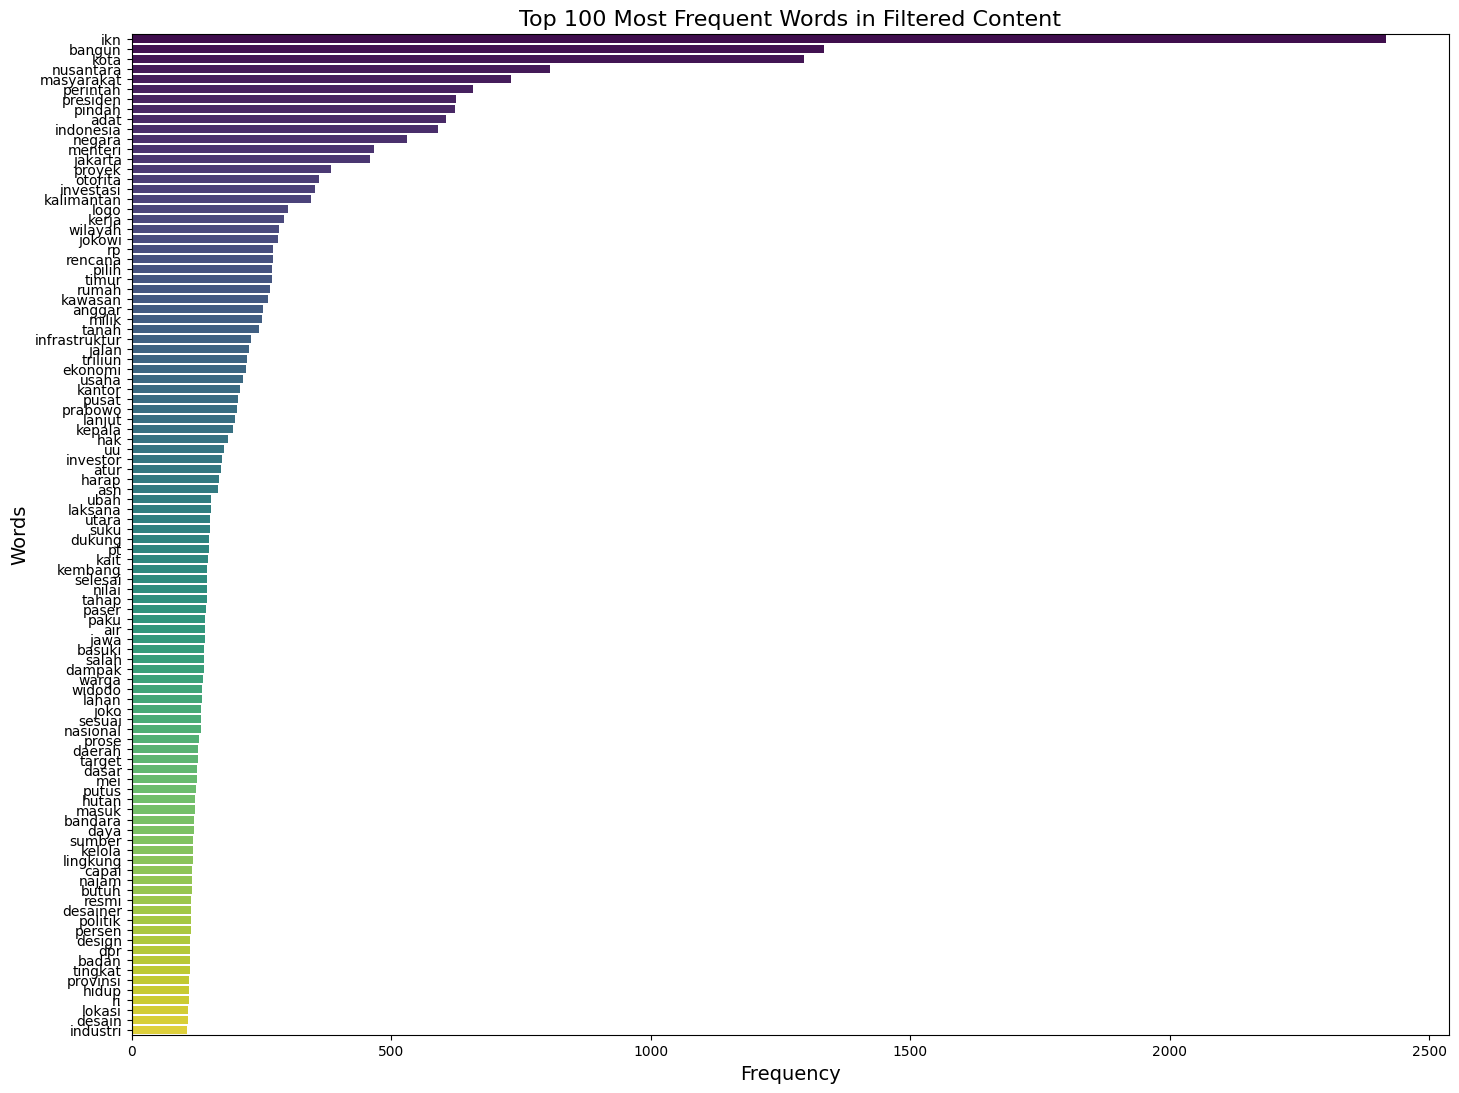

In [ ]:

# Get top 100 most frequent words
top_n = 100
top_words_filtered = freq_filtered.head(top_n)

# Plot frequency distribution
plt.figure(figsize=(17, 13))
sns.barplot(x='count', y='word', data=top_words_filtered, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in Filtered Content", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()


In [ ]:
# Melihat keseluruhan baris

# Mengatur pandas agar menampilkan seluruh baris DataFrame
pd.set_option('display.max_rows', None)

# Menampilkan seluruh isi DataFrame
print(top_words_filtered)

# Setelah selesai, Anda bisa mengembalikan pengaturan agar hanya menampilkan sebagian baris
pd.reset_option('display.max_rows')

               word  count
12              ikn   2417
32           bangun   1334
3              kota   1296
11        nusantara    806
88       masyarakat    731
20         perintah    657
16         presiden    625
2            pindah    623
107            adat    606
7         indonesia    591
4            negara    531
34          menteri    467
134         jakarta    460
101          proyek    384
276         otorita    361
45        investasi    353
9        kalimantan    345
1026           logo    301
63            kerja    293
55          wilayah    284
82           jokowi    282
69               rp    273
35          rencana    272
461           pilih    271
10            timur    271
67            rumah    267
46          kawasan    262
200          anggar    253
118           milik    252
125           tanah    246
215   infrastruktur    231
207           jalan    226
70          triliun    222
65          ekonomi    220
342           usaha    215
218          kantor    209
5

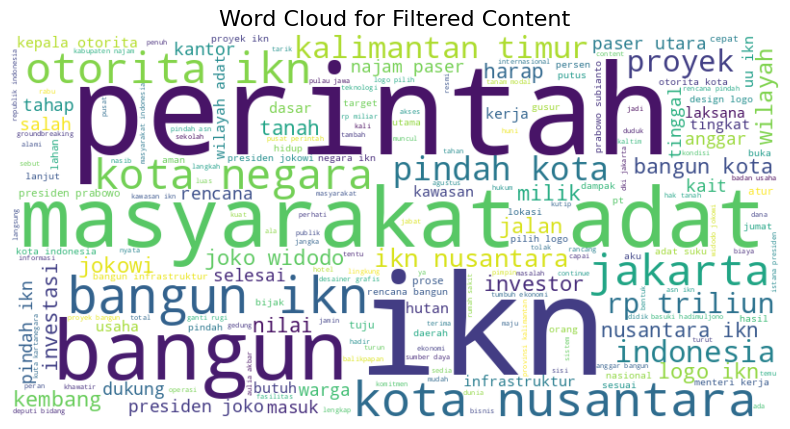

In [ ]:
# Create word cloud for filtered content
wordcloud_filtered = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(' '.join(ikn_news_df_with_ikn['filtered_content'].astype(str)))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Filtered Content', fontsize=16)
plt.show()

In [ ]:
# Calculate frequencies for filtered_content pada dataframe tanpa IKN
freq_filtered_without_ikn = get_word_frequencies(ikn_news_df_without_ikn['filtered_content'])
freq_filtered_without_ikn.sort_values(by='count', ascending=False, inplace=True)


<ipython-input-84-5f7a000b956b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_filtered_without_ikn, palette='viridis')


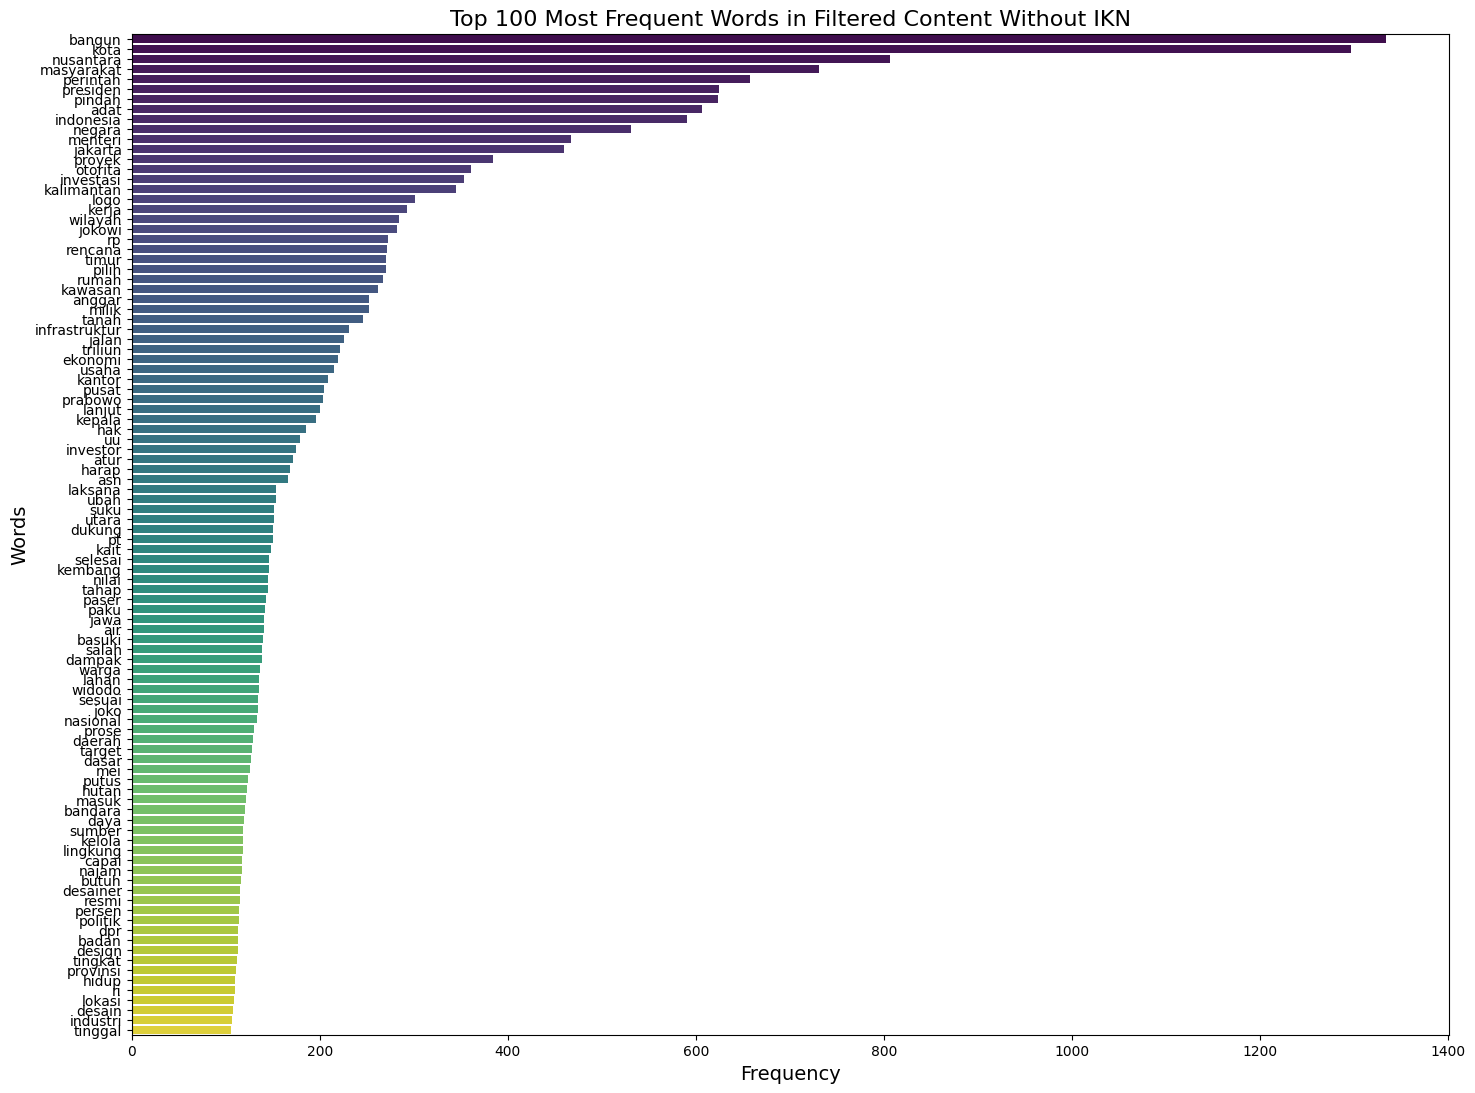

In [ ]:
# Get top 100 most frequent words
top_n = 100
top_words_filtered_without_ikn = freq_filtered_without_ikn.head(top_n)

# Plot frequency distribution
plt.figure(figsize=(17, 13))
sns.barplot(x='count', y='word', data=top_words_filtered_without_ikn, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in Filtered Content Without IKN", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()


In [ ]:
# Mengatur pandas agar menampilkan seluruh baris DataFrame
pd.set_option('display.max_rows', None)

# Menampilkan seluruh isi DataFrame
print(top_words_filtered_without_ikn)

# Setelah selesai, kembalikan pengaturan agar hanya menampilkan sebagian baris
pd.reset_option('display.max_rows')


               word  count
31           bangun   1334
3              kota   1296
11        nusantara    806
87       masyarakat    731
19         perintah    657
15         presiden    625
2            pindah    623
106            adat    606
7         indonesia    591
4            negara    531
33          menteri    467
133         jakarta    460
100          proyek    384
275         otorita    361
44        investasi    353
9        kalimantan    345
1025           logo    301
62            kerja    293
54          wilayah    284
81           jokowi    282
68               rp    273
34          rencana    272
10            timur    271
460           pilih    271
66            rumah    267
45          kawasan    262
199          anggar    253
117           milik    252
124           tanah    246
214   infrastruktur    231
206           jalan    226
69          triliun    222
64          ekonomi    220
341           usaha    215
217          kantor    209
52            pusat    205
5

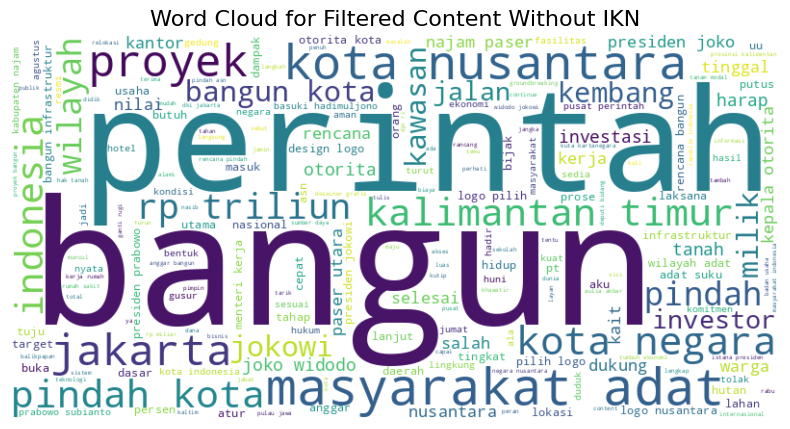

In [ ]:
# Create word cloud for filtered content without IKN
wordcloud_filtered_without_ikn = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(' '.join(ikn_news_df_without_ikn['filtered_content'].astype(str)))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered_without_ikn, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Filtered Content Without IKN', fontsize=16)
plt.show()


In [ ]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'ikn_news_df_after_stopwords_lemm_filtered.csv'
ikn_news_df_with_ikn.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke ikn_news_df_after_stopwords_lemm_filtered.csv


In [ ]:
# Menyimpan DataFrame ke file Excel
ikn_news_df_with_ikn.to_excel('ikn_news_df_after_stopwords_lemm_filtered.xlsx', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke ikn_news_df_after_stopwords_lemm_filtered.xlsx")

DataFrame berhasil disimpan ke ikn_news_df_after_stopwords_lemm_filtered.xlsx


In [ ]:
ikn_news_df_with_ikn.loc[:,['judul', 'content', 'wordCount', 'filtered_content']]

judul  \
0                pro kontra pemindahan ibu kota negara   
1    pro dan kontra megaproyek nusantara: nyata ata...   
2                           pro kontra pembangunan IKN   
3    pro kontra ibu kota baru ri, simak perdebatan ...   
4    pro-kontra saat pemerintah ngotot putuskan rev...   
..                                                 ...   
186  jk cerita terkejut ibu kota negara diputuskan ...   
187  agenda tersembunyi dan argumen terhadap kritik...   
188  pernyataan lengkap anies kritik IKN timbulkan ...   
189  golkar heran anies kritik tujuan dan langkah b...   
190        kritik bertubi terkait ibu kota negara baru   

                                               content  wordCount  \
0    Pro Kontra Pemindahan Ibu Kota Negara Tim Reda...        547   
1    Catatan: Artikel ini merupakan opini pribadi p...       1616   
2    Saya adalah mahasiswa Fakultas Hukum Universit...        720   
3    Jakarta, CNBC Indonesia - Ibu Kota Negara (IKN...        577   
4    Scroll ke bawah untuk membaca berita Baca beri...        868   
..                                                 ...        ...   
186  JK Cerita Terkejut Ibu Kota Negara Diputuskan ...        420   
187  Relokasi ibu kota negara selalu penuh pro kont...       1526   
188  Calon presiden (capres) Anies Baswedan mengkri...        415   
189  Capres nomor urut 1, Anies Baswedan, mengkriti...        355   
190  Print Rencana pembangunan Ibu Kota Negara (IKN...       1029   

                                      filtered_content  
0    pro kontra pindah kota negara tim redaksi kota...  
1    catat artikel pribadi tulis cermin pandang red...  
2    mahasiswa fakultas hukum universitas minat huk...  
3    jakarta cnbc indonesia kota negara ikn indones...  
4    baca agustus wib dengar artikel bagi gabung te...  
..                                                 ...  
186  jk cerita kota negara putus pindah teliti tim ...  
187  relokasi kota negara penuh pro kontra bukti ga...  
188  calon presiden anies bangun kota negara ikn nu...  
189  nomor urut anies kritik langkah bangun kota nu...  
190  rencana bangun kota negara ikn najam paser uta...  

[191 rows x 4 columns]

## Sentiment Analysis Setelah Preprocessing

In [ ]:
!pip install nltk
!pip install transformers

In [ ]:
# Install dan import library (jalankan hanya jika diperlukan)
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import pandas as pd
from collections import Counter
from wordcloud import WordCloud

# Load IndoBERT sentiment pipeline (gunakan model yang sudah fine-tuned)
classifier = pipeline(
    "sentiment-analysis",
    model="w11wo/indonesian-roberta-base-sentiment-classifier"
)

# Fungsi memotong teks panjang menjadi chunk
def chunk_text(text, max_words=270):
    tokens = word_tokenize(text)
    for i in range(0, len(tokens), max_words):
        yield ' '.join(tokens[i:i + max_words])

# Fungsi analisis sentimen dengan chunking
def analyze_sentiment_with_chunking(text):
    chunks = list(chunk_text(text))
    results = classifier(chunks)

    # Hitung label dominan dari semua chunk
    label_counts = Counter([res['label'] for res in results])
    final_label = label_counts.most_common(1)[0][0]

    # Ambil skor rata-rata sebagai estimasi
    avg_score = sum(res['score'] for res in results) / len(results)
    return pd.Series([final_label, avg_score])

# Terapkan ke DataFrame
ikn_news_df_with_ikn[['sentiment_label', 'sentiment_score']] = ikn_news_df_with_ikn['filtered_content'].apply(analyze_sentiment_with_chunking)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


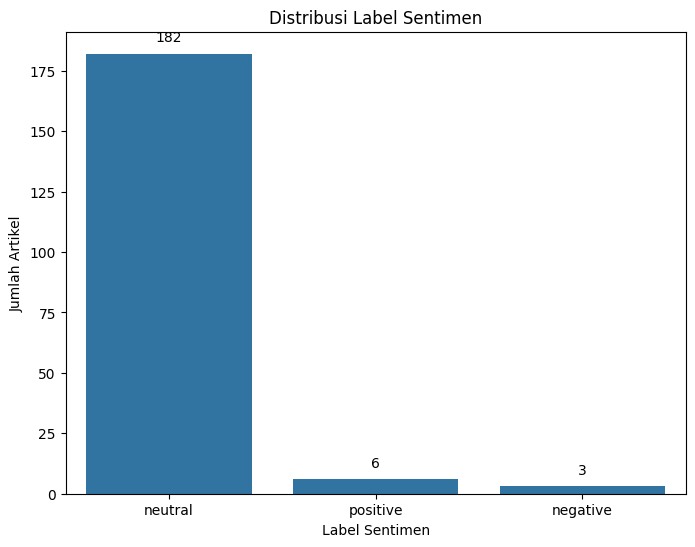

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x='sentiment_label',
    data=ikn_news_df_with_ikn,
    order=ikn_news_df_with_ikn['sentiment_label'].value_counts().index
)
plt.title('Distribusi Label Sentimen')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Artikel')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # posisi tengah batang
        y=height + 5,                    # posisi sedikit di atas batang
        s=int(height),                   # teks jumlah frekuensi (integer)
        ha='center'                     # rata tengah secara horizontal
    )

plt.show()


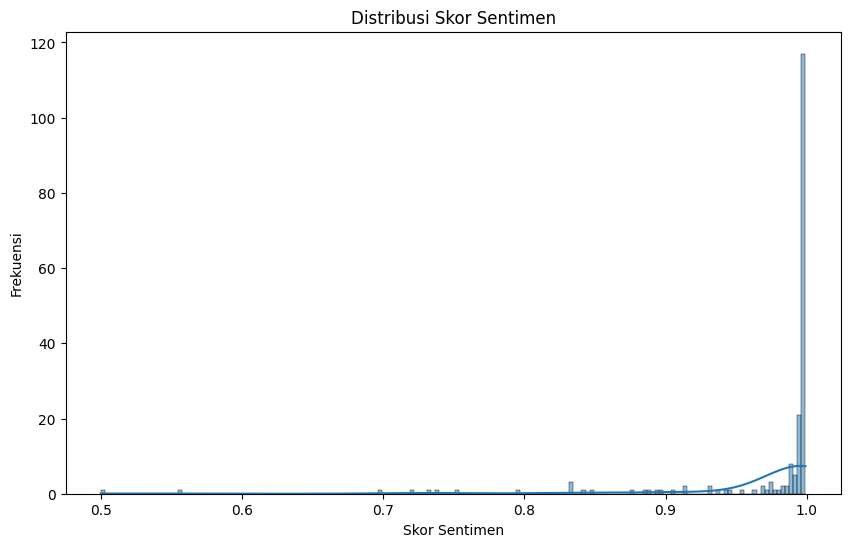

In [ ]:
# Distribusi skor sentimen
plt.figure(figsize=(10, 6))
sns.histplot(ikn_news_df_with_ikn['sentiment_score'], kde=True)
plt.title('Distribusi Skor Sentimen')
plt.xlabel('Skor Sentimen')
plt.ylabel('Frekuensi')
plt.show()

## Sentiment Analysis berdasarkan penerbit

In [ ]:
# Menghitung frekuensi penerbit
penerbit_freq = ikn_news_df_with_ikn['penerbit'].value_counts()

# Menampilkan hasil
print(penerbit_freq)

penerbit
Kompas             21
Detik              18
Tempo              14
Suara              14
CNBC Indonesia​    13
                   ..
Tangsel Pos​        1
Katadata​           1
CNN Indonesia​      1
RHB Tradesmart​     1
VOA Indonesia       1
Name: count, Length: 75, dtype: int64


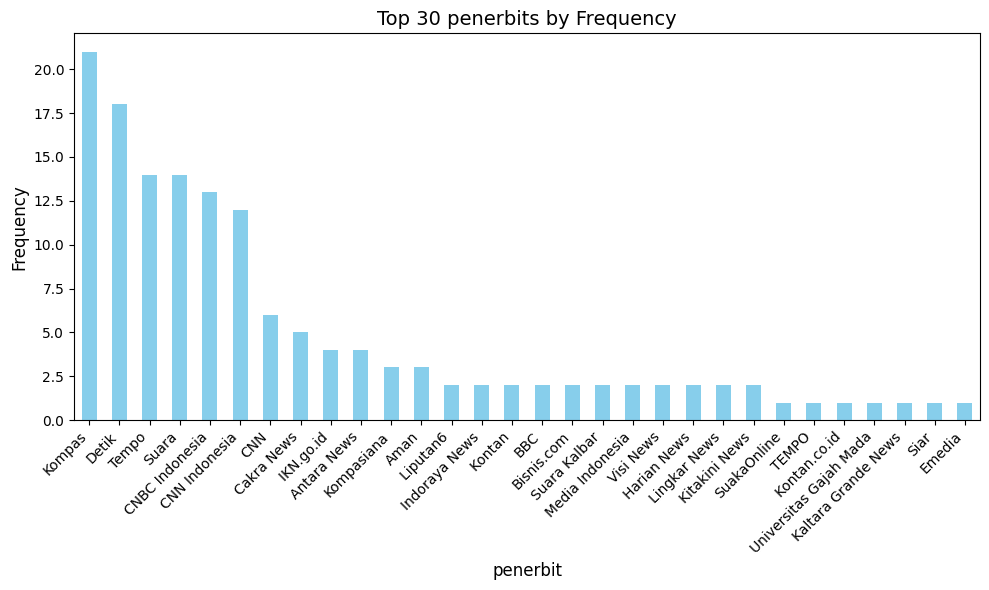

penerbit
Kompas             21
Detik              18
Tempo              14
Suara              14
CNBC Indonesia​    13
                   ..
Tangsel Pos​        1
Katadata​           1
CNN Indonesia​      1
RHB Tradesmart​     1
VOA Indonesia       1
Name: count, Length: 75, dtype: int64


In [ ]:
# Menghitung frekuensi penerbit
penerbit_freq = ikn_news_df_with_ikn['penerbit'].value_counts()

# Mengambil top 30 penerbit berdasarkan frekuensi
top_30_penerbit = penerbit_freq.head(30)

# Membuat diagram batang (bar plot)
plt.figure(figsize=(10, 6))
top_30_penerbit.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Top 30 penerbits by Frequency', fontsize=14)
plt.xlabel('penerbit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotasi label x untuk lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan hasil
print(penerbit_freq)

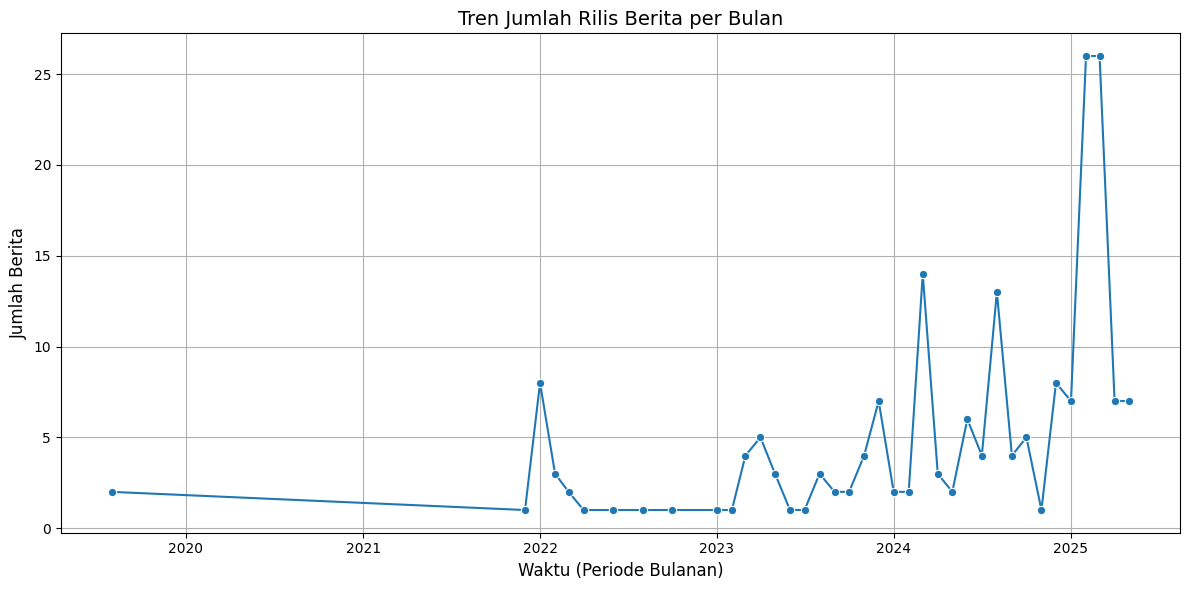


Jumlah berita terbanyak per bulan untuk setiap tahun:
    tahun nama_bulan  jumlah_berita
0    2019     August              2
1    2021   December              1
2    2022    January              8
20   2023   December              7
23   2024      March             14
34   2025   February             26


In [ ]:
import calendar

# Pastikan kolom 'tanggal' dalam format datetime
ikn_news_df['tanggal'] = pd.to_datetime(ikn_news_df['tanggal'], errors='coerce')

# Ekstrak tahun dan bulan
ikn_news_df['bulan'] = ikn_news_df['tanggal'].dt.month

# Hitung jumlah berita per tahun dan bulan
berita_per_bulan = ikn_news_df.groupby(['tahun', 'bulan']).size().reset_index(name='jumlah_berita')

# Buat kolom periode (datetime) agar cocok untuk time series
berita_per_bulan['periode'] = pd.to_datetime(berita_per_bulan['tahun'].astype(str) + '-' + berita_per_bulan['bulan'].astype(str))

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=berita_per_bulan, x='periode', y='jumlah_berita', marker='o')

plt.title('Tren Jumlah Rilis Berita per Bulan', fontsize=14)
plt.xlabel('Waktu (Periode Bulanan)', fontsize=12)
plt.ylabel('Jumlah Berita', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Hitung jumlah berita per (tahun, bulan)
berita_per_bulan = ikn_news_df.groupby(['tahun', 'bulan']).size().reset_index(name='jumlah_berita')

# Ambil bulan dengan jumlah berita terbanyak di setiap tahun
top_bulan_per_tahun = berita_per_bulan.loc[berita_per_bulan.groupby('tahun')['jumlah_berita'].idxmax()]

# Tambahkan nama bulan
top_bulan_per_tahun['nama_bulan'] = top_bulan_per_tahun['bulan'].apply(lambda x: calendar.month_name[x])

# Urutkan berdasarkan tahun
top_bulan_per_tahun = top_bulan_per_tahun.sort_values('tahun')

# Tampilkan tabel hasil
print("\nJumlah berita terbanyak per bulan untuk setiap tahun:")
print(top_bulan_per_tahun[['tahun', 'nama_bulan', 'jumlah_berita']])

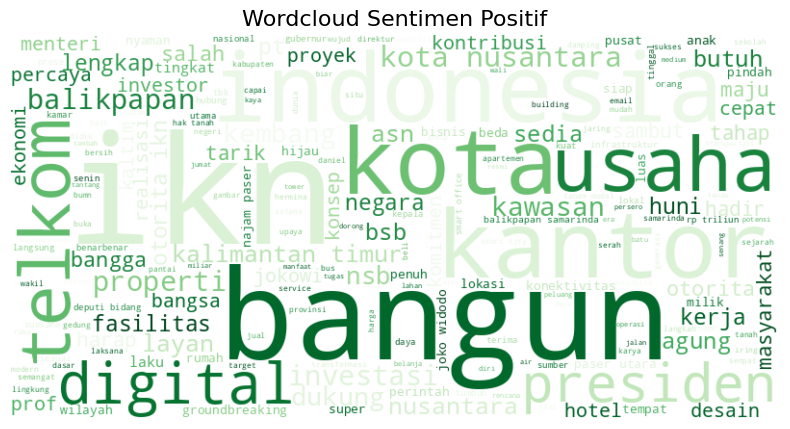

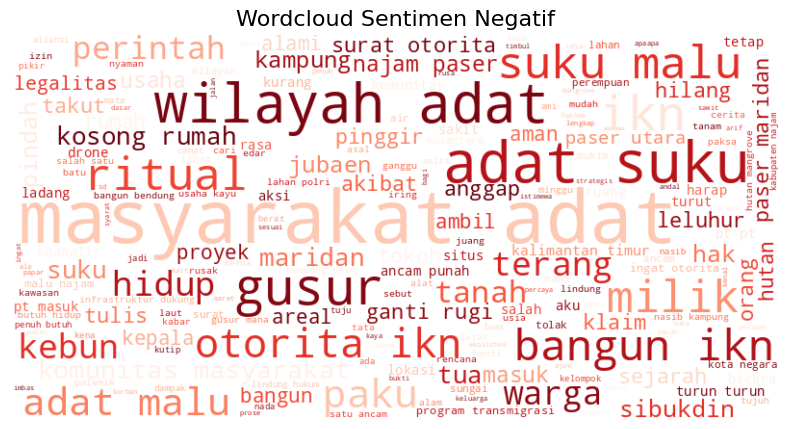

In [ ]:
# WordCloud per sentimen
positive_words = ' '.join(ikn_news_df_with_ikn[ikn_news_df_with_ikn['sentiment_label'] == 'positive']['filtered_content'])
negative_words = ' '.join(ikn_news_df_with_ikn[ikn_news_df_with_ikn['sentiment_label'] == 'negative']['filtered_content'])

# Wordcloud positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif', fontsize=16)
plt.show()

# Wordcloud negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Negatif', fontsize=16)
plt.show()

<ipython-input-98-65c7948e4bea>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=positive_df, palette='viridis')
<ipython-input-98-65c7948e4bea>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=negative_df, palette='viridis')


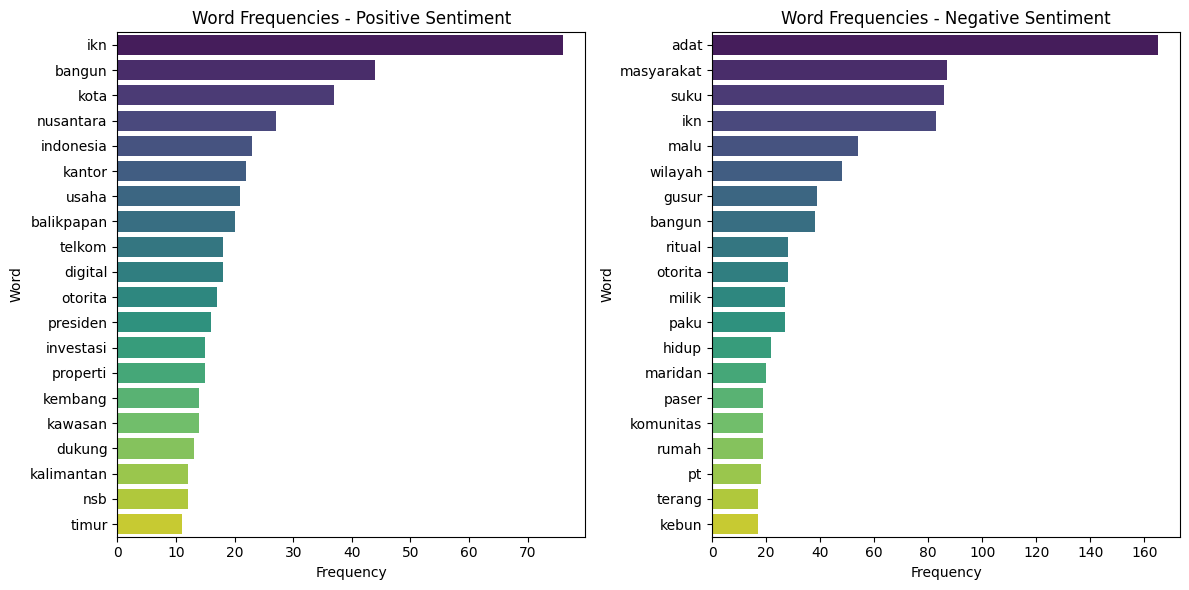

In [ ]:

# Calculate word frequencies for positive and negative sentiments
positive_freq = Counter(" ".join(ikn_news_df_with_ikn[ikn_news_df_with_ikn['sentiment_label'] == 'positive']['filtered_content']).split())
negative_freq = Counter(" ".join(ikn_news_df_with_ikn[ikn_news_df_with_ikn['sentiment_label'] == 'negative']['filtered_content']).split())

# Convert to DataFrames
positive_df = pd.DataFrame(positive_freq.most_common(20), columns=['word', 'frequency'])
negative_df = pd.DataFrame(negative_freq.most_common(20), columns=['word', 'frequency'])

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='frequency', y='word', data=positive_df, palette='viridis')
plt.title('Word Frequencies - Positive Sentiment')
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.subplot(1, 2, 2)
sns.barplot(x='frequency', y='word', data=negative_df, palette='viridis')
plt.title('Word Frequencies - Negative Sentiment')
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.tight_layout()
plt.show()


In [ ]:
ikn_news_df_with_ikn[['filtered_content', 'sentiment_label', 'sentiment_score']]

filtered_content sentiment_label  \
0    pro kontra pindah kota negara tim redaksi kota...         neutral   
1    catat artikel pribadi tulis cermin pandang red...         neutral   
2    mahasiswa fakultas hukum universitas minat huk...         neutral   
3    jakarta cnbc indonesia kota negara ikn indones...         neutral   
4    baca agustus wib dengar artikel bagi gabung te...         neutral   
..                                                 ...             ...   
186  jk cerita kota negara putus pindah teliti tim ...         neutral   
187  relokasi kota negara penuh pro kontra bukti ga...         neutral   
188  calon presiden anies bangun kota negara ikn nu...         neutral   
189  nomor urut anies kritik langkah bangun kota nu...         neutral   
190  rencana bangun kota negara ikn najam paser uta...         neutral   

     sentiment_score  
0           0.998764  
1           0.971547  
2           0.997783  
3           0.994796  
4           0.997458  
..               ...  
186         0.993926  
187         0.994136  
188         0.990375  
189         0.995656  
190         0.996658  

[191 rows x 3 columns]

In [ ]:
# Menyimpan DataFrame ke file Excel
ikn_news_df_with_ikn.to_excel('ikn_clean.xlsx', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke ikn_clean.xlsx")

DataFrame berhasil disimpan ke ikn_clean.xlsx


In [ ]:
# Menyimpan DataFrame ke file Excel
ikn_news_df_with_ikn.to_csv('ikn_clean.csv', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke ikn_clean.csv")

DataFrame berhasil disimpan ke ikn_clean.csv


##Sentiment analysis without ikn


In [ ]:
# Terapkan sentiment analysis pada data tanpa ikn
ikn_news_df_without_ikn[['sentiment_label', 'sentiment_score']] = ikn_news_df_without_ikn['filtered_content'].apply(analyze_sentiment_with_chunking)

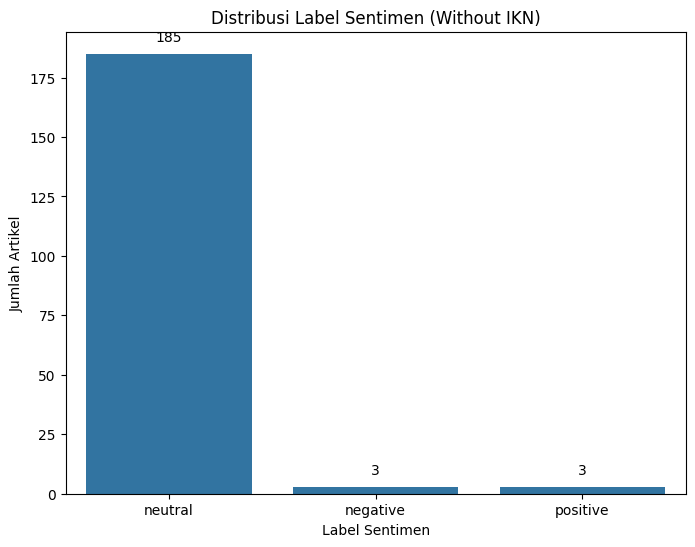

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x='sentiment_label',
    data=ikn_news_df_without_ikn,
    order=ikn_news_df_without_ikn['sentiment_label'].value_counts().index
)
plt.title('Distribusi Label Sentimen (Without IKN)')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Artikel')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 5,
        s=int(height),
        ha='center'
    )

plt.show()


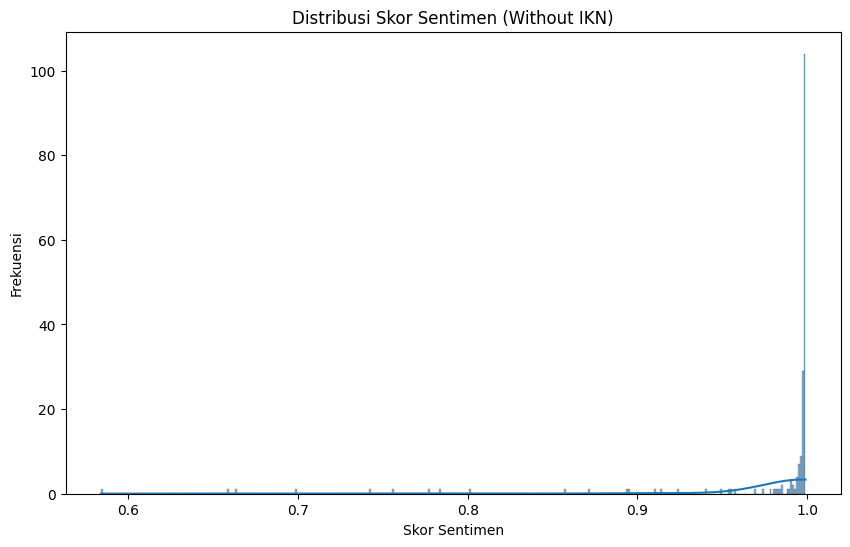

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ikn_news_df_without_ikn['sentiment_score'], kde=True)
plt.title('Distribusi Skor Sentimen (Without IKN)')
plt.xlabel('Skor Sentimen')
plt.ylabel('Frekuensi')
plt.show()


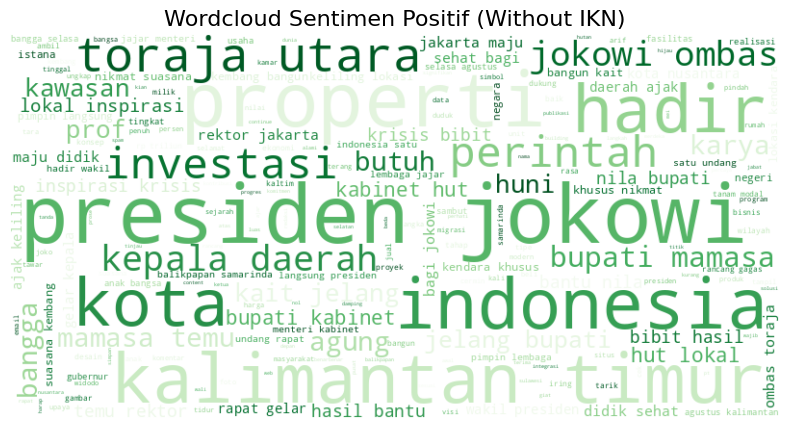

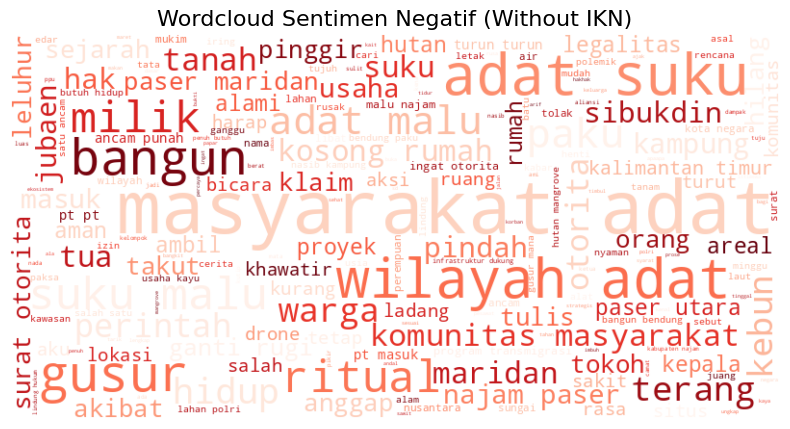

In [ ]:
positive_words_wo = ' '.join(ikn_news_df_without_ikn[ikn_news_df_without_ikn['sentiment_label'] == 'positive']['filtered_content'])
negative_words_wo = ' '.join(ikn_news_df_without_ikn[ikn_news_df_without_ikn['sentiment_label'] == 'negative']['filtered_content'])

# Wordcloud positif tanpa ikn
wordcloud_positive_wo = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words_wo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive_wo, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif (Without IKN)', fontsize=16)
plt.show()

# Wordcloud negatif tanpa ikn
wordcloud_negative_wo = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words_wo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative_wo, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Negatif (Without IKN)', fontsize=16)
plt.show()


<ipython-input-106-44c58c0a53b4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=positive_df_wo, palette='viridis')
<ipython-input-106-44c58c0a53b4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=negative_df_wo, palette='viridis')


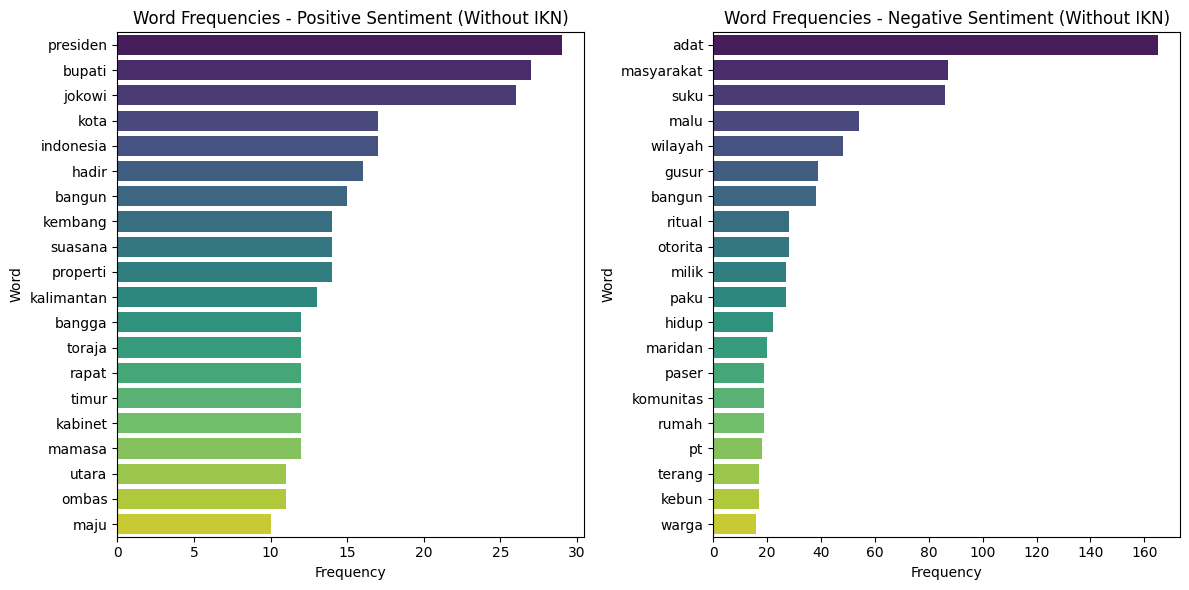

In [ ]:
positive_freq_wo = Counter(" ".join(ikn_news_df_without_ikn[ikn_news_df_without_ikn['sentiment_label'] == 'positive']['filtered_content']).split())
negative_freq_wo = Counter(" ".join(ikn_news_df_without_ikn[ikn_news_df_without_ikn['sentiment_label'] == 'negative']['filtered_content']).split())

positive_df_wo = pd.DataFrame(positive_freq_wo.most_common(20), columns=['word', 'frequency'])
negative_df_wo = pd.DataFrame(negative_freq_wo.most_common(20), columns=['word', 'frequency'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='frequency', y='word', data=positive_df_wo, palette='viridis')
plt.title('Word Frequencies - Positive Sentiment (Without IKN)')
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.subplot(1, 2, 2)
sns.barplot(x='frequency', y='word', data=negative_df_wo, palette='viridis')
plt.title('Word Frequencies - Negative Sentiment (Without IKN)')
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.tight_layout()
plt.show()


In [ ]:
# Menyimpan DataFrame ke file Excel
ikn_news_df_without_ikn.to_excel('ikn_clean_without_IKN.xlsx', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke ikn_clean_without_IKN.xlsx")

DataFrame berhasil disimpan ke ikn_clean_without_IKN.xlsx


In [ ]:
# Menyimpan DataFrame ke file Excel
ikn_news_df_without_ikn.to_csv('ikn_clean_without_IKN.csv', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke ikn_clean_without_IKN.csv")

DataFrame berhasil disimpan ke ikn_clean_without_IKN.csv
